# **Analisis de series temprales en la atención al público**

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
import statsmodels.api as sm
from scipy import stats
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

In [2]:
# Lee el archivo Excel en un DataFrame de pandas
data = pd.read_excel("ST_ATENCION2.xlsx")
# Ahora puedes trabajar con los datos en el DataFrame
print(data.head())

       FECHA  WAPP  TP  TAD  PP
0 2022-03-15    19  78   53   9
1 2022-03-16    12  70   26  12
2 2022-03-17    14  66   41  14
3 2022-03-18    67  50   20   9
4 2022-03-21    45  65   44   8


In [3]:
data.dtypes

FECHA    datetime64[ns]
WAPP              int64
TP                int64
TAD               int64
PP                int64
dtype: object

In [4]:
data.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset
data.head()

WAPP  TP  TAD  PP
FECHA                        
2022-03-15    19  78   53   9
2022-03-16    12  70   26  12
2022-03-17    14  66   41  14
2022-03-18    67  50   20   9
2022-03-21    45  65   44   8

In [5]:
data.isna().sum()

WAPP    0
TP      0
TAD     0
PP      0
dtype: int64

---
### **Graficamos la serie temporal**

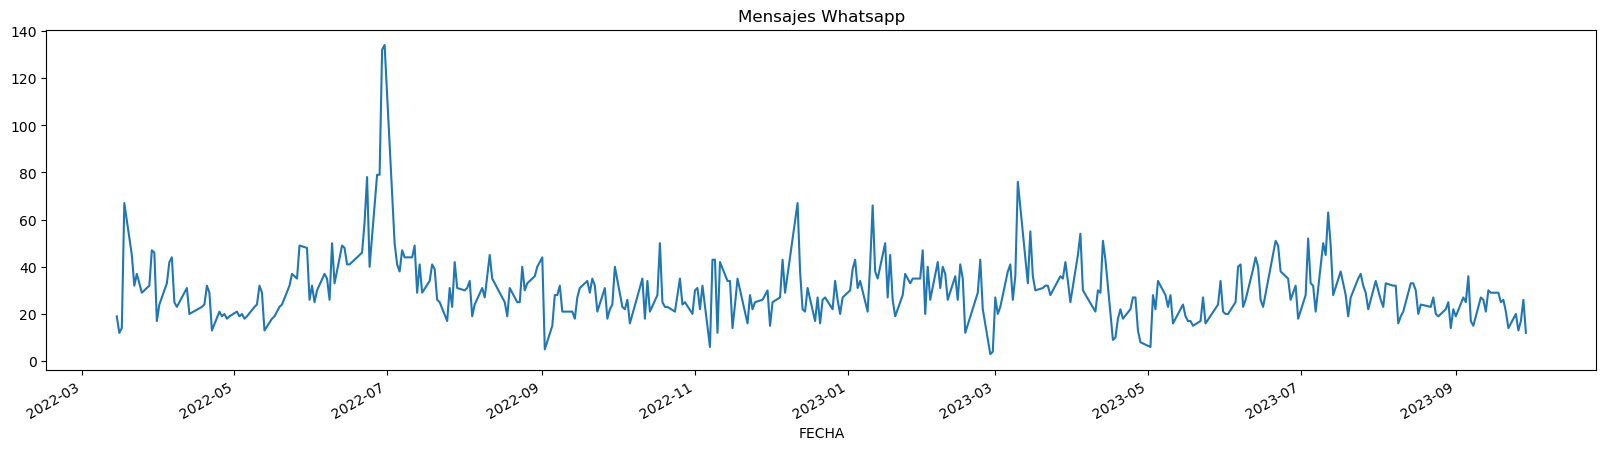

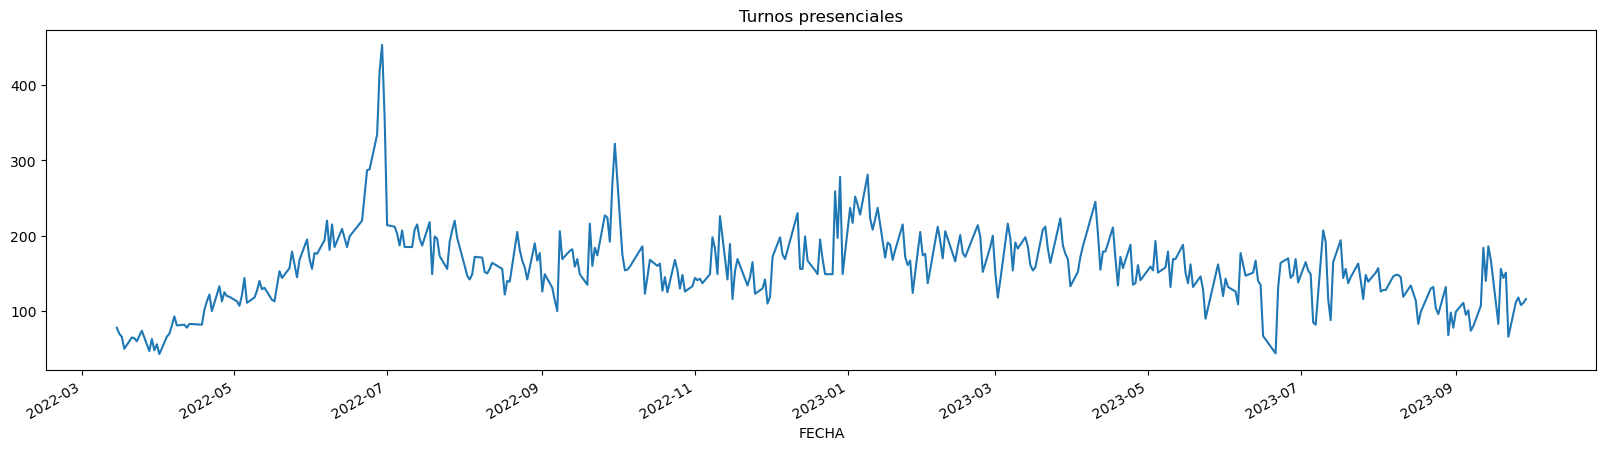

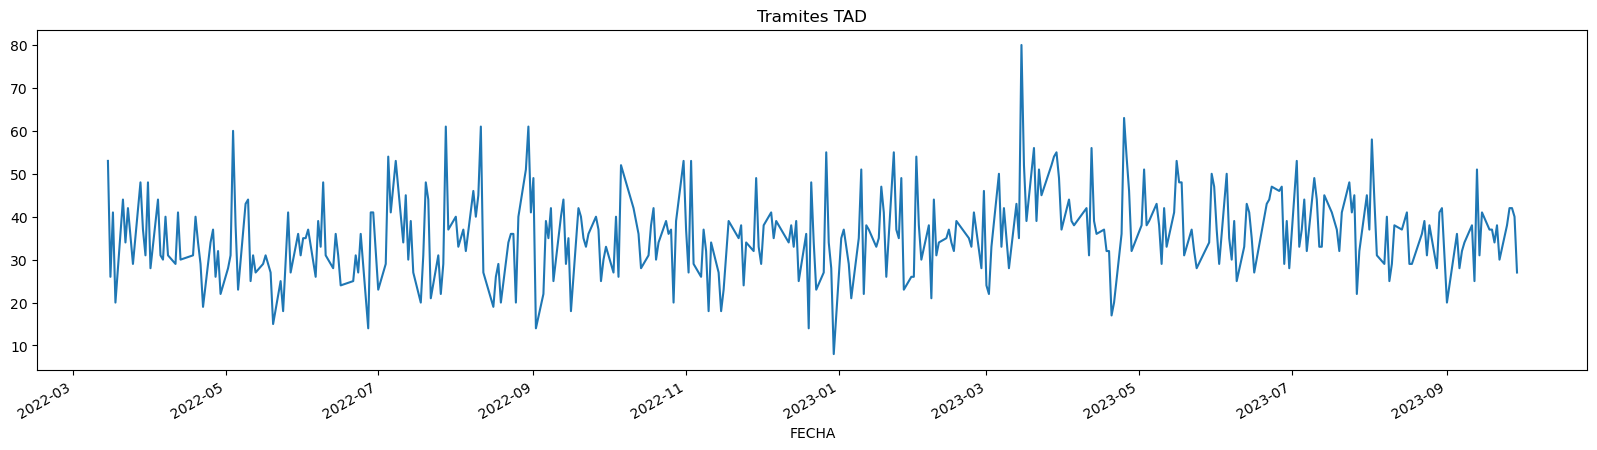

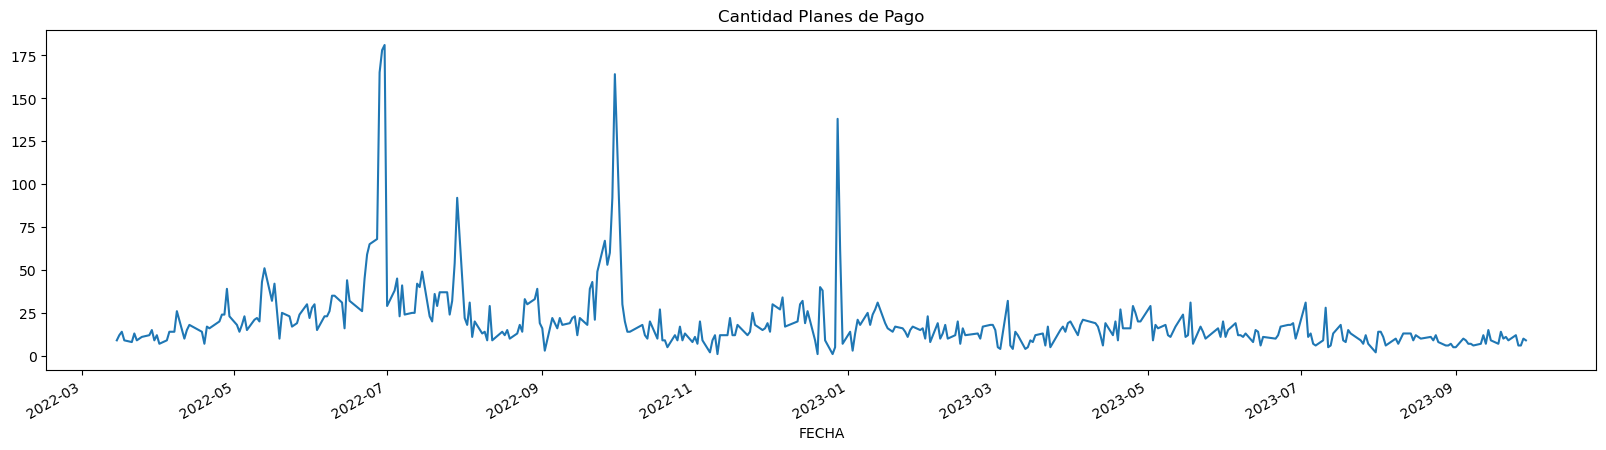

In [6]:
data.WAPP.plot(figsize=(20,5), title = "Mensajes Whatsapp")
plt.show()
data.TP.plot(figsize=(20,5), title = "Turnos presenciales")
plt.show()
data.TAD.plot(figsize=(20,5), title = "Tramites TAD")
plt.show()
data.PP.plot(figsize=(20,5), title = "Cantidad Planes de Pago")
plt.show()

---
### **Representación gráfica de la Función de Autocorrelación**

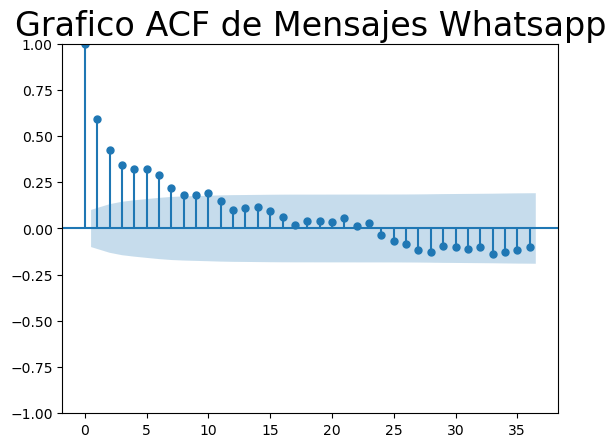

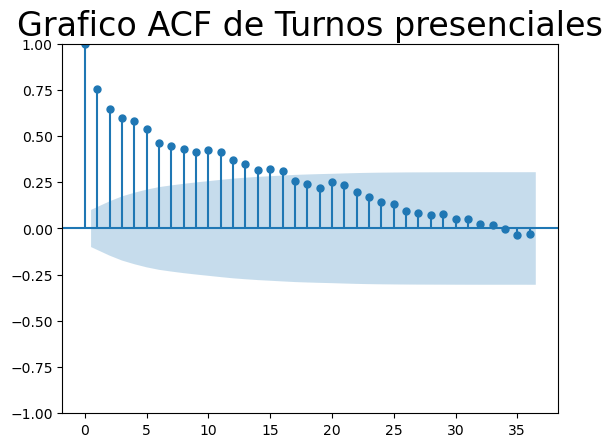

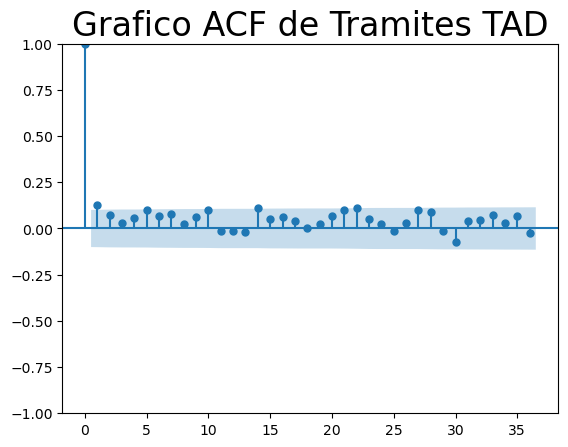

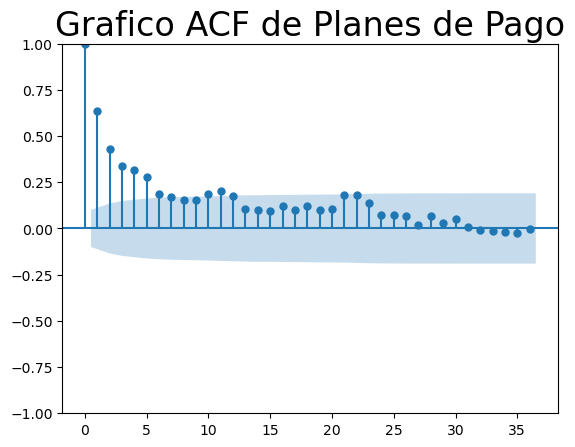

In [7]:
plot_acf(data.WAPP,lags=36)
plt.title("Grafico ACF de Mensajes Whatsapp", size= 24)
plt.show()
plot_acf(data.TP,lags=36)
plt.title("Grafico ACF de Turnos presenciales", size= 24)
plt.show()
plot_acf(data.TAD,lags=36)
plt.title("Grafico ACF de Tramites TAD", size= 24)
plt.show()
plot_acf(data.PP,lags=36)
plt.title("Grafico ACF de Planes de Pago", size= 24)
plt.show()

---
### **Representación gráfica de la Función de Autocorrelación Parcial**

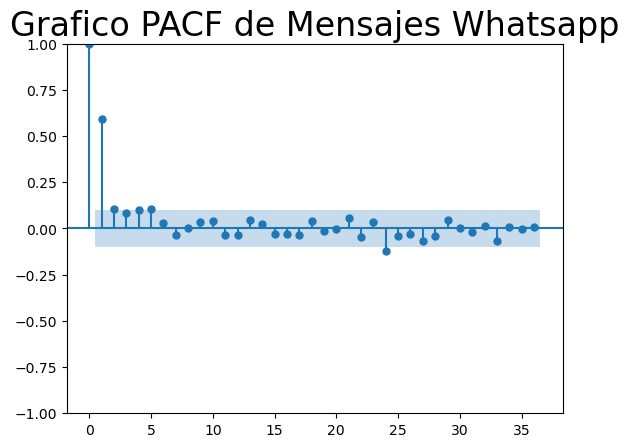

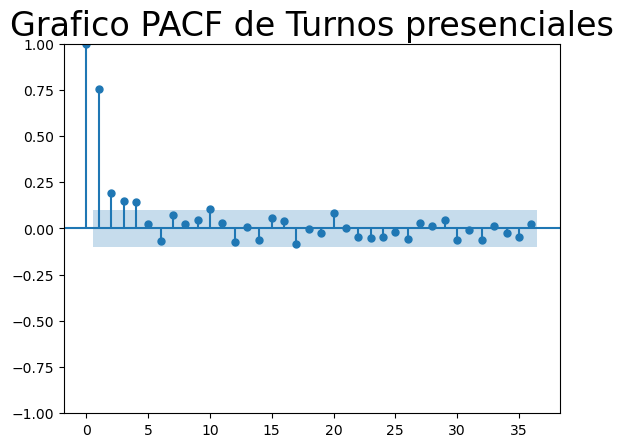

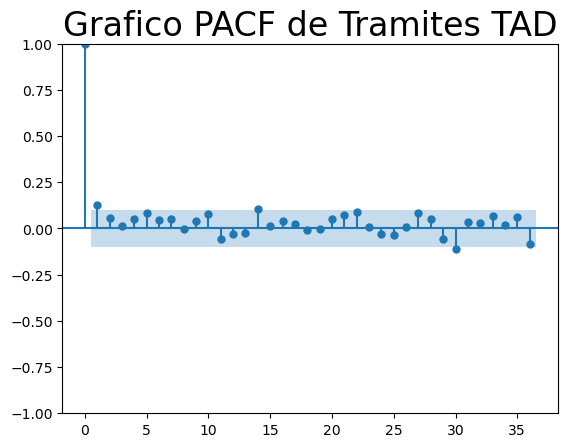

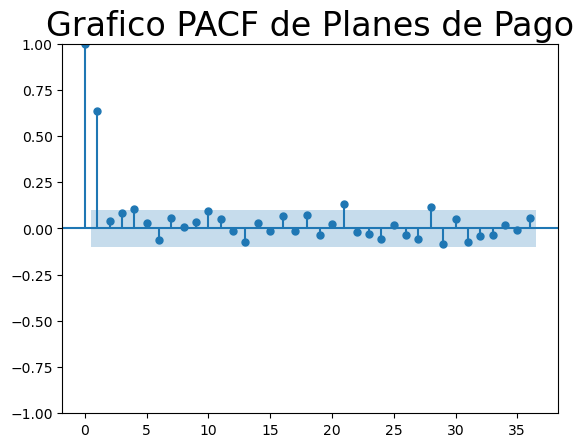

In [8]:
plot_pacf(data.WAPP,lags=36)
plt.title("Grafico PACF de Mensajes Whatsapp", size= 24)
plt.show()
plot_pacf(data.TP,lags=36)
plt.title("Grafico PACF de Turnos presenciales", size= 24)
plt.show()
plot_pacf(data.TAD,lags=36)
plt.title("Grafico PACF de Tramites TAD", size= 24)
plt.show()
plot_pacf(data.PP,lags=36)
plt.title("Grafico PACF de Planes de Pago", size= 24)
plt.show()

---
### **Descomposición aditiva**

Para visualizar y analizar las componentes de la serie de tiempo descompuesta, lo que puede ayudar a comprender la estructura de los datos y los patrones estacionales y de tendencia que pueden estar presentes. 

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

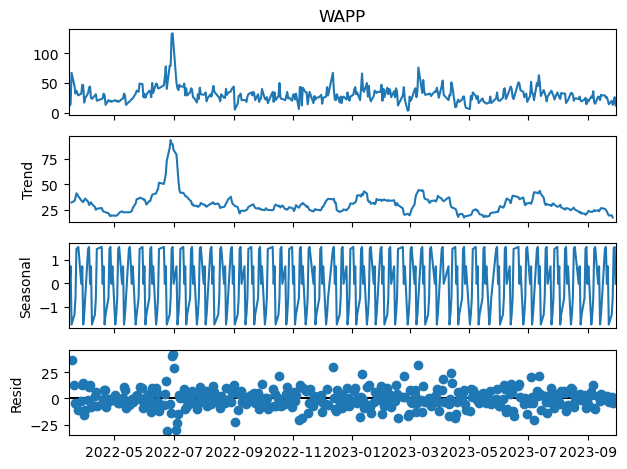

In [10]:
aditiveWP = seasonal_decompose(data.WAPP, model = "aditive", period=7)
aditiveWP.plot()
plt.show()

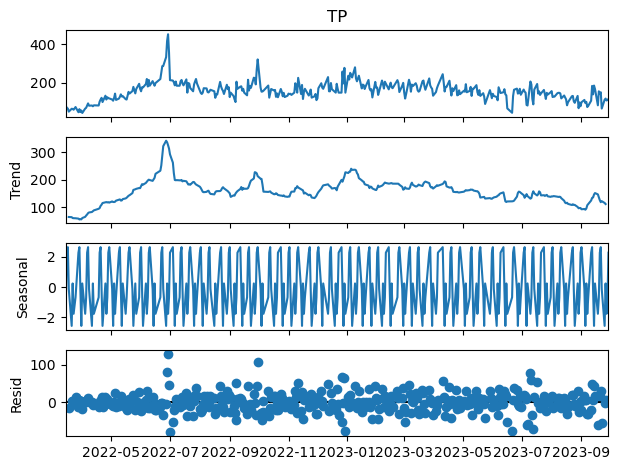

In [11]:
aditiveTP = seasonal_decompose(data.TP, model = "aditive", period=7)
aditiveTP.plot()
plt.show()

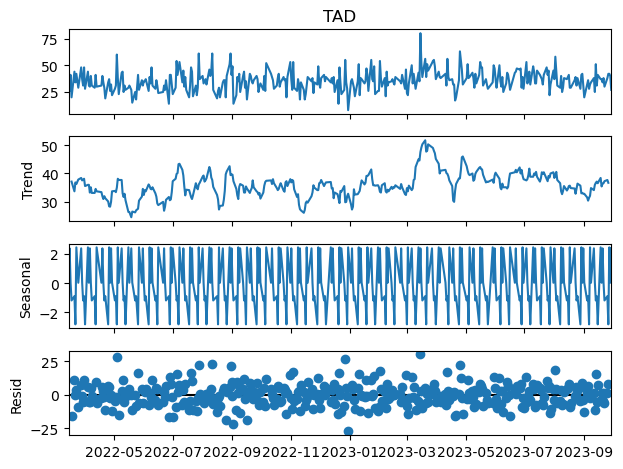

In [12]:
aditiveTAD = seasonal_decompose(data.TAD, model = "aditive", period=7)
aditiveTAD.plot()
plt.show()

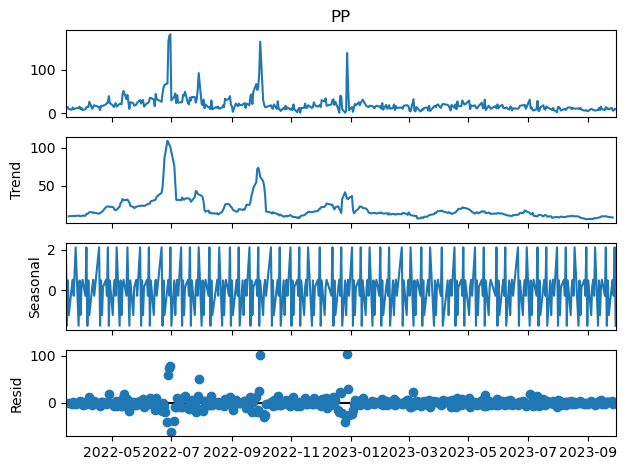

In [13]:
aditivePP = seasonal_decompose(data.PP, model = "aditive", period=7)
aditivePP.plot()
plt.show()

---
---
## **3. Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?. Justificar con teoría.**

---
### **Representación gráfica de la Función de Autocorrelación**

In [14]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='MENSAJES DE WHATSAPP')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.legend()
  plt.show()

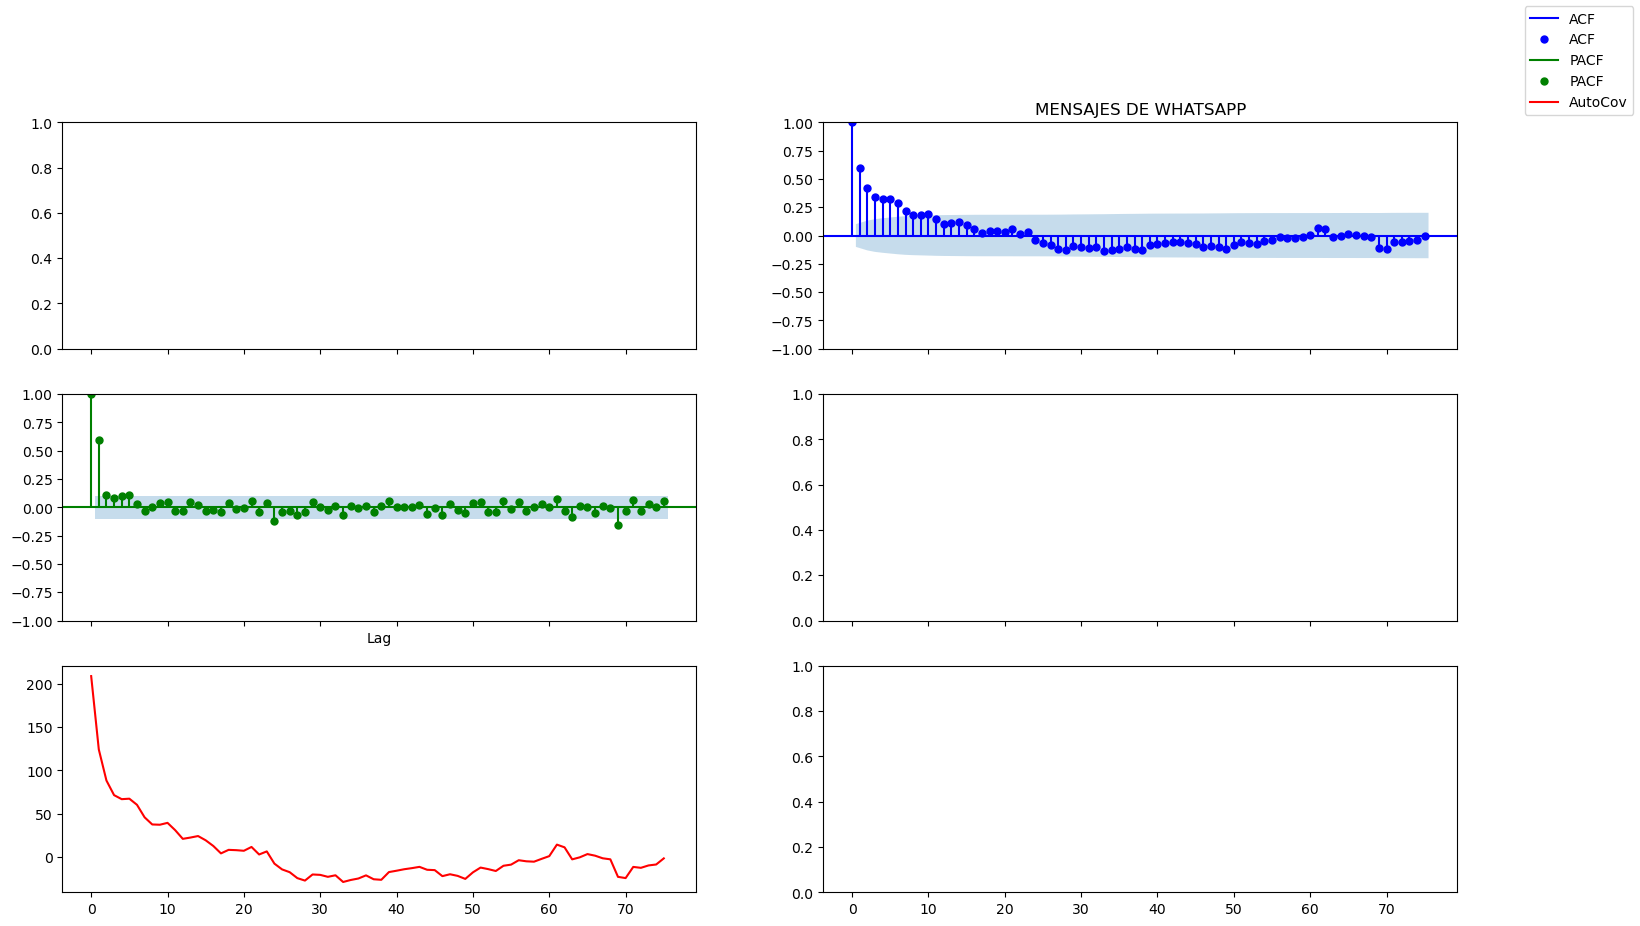

In [15]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.WAPP ,36)

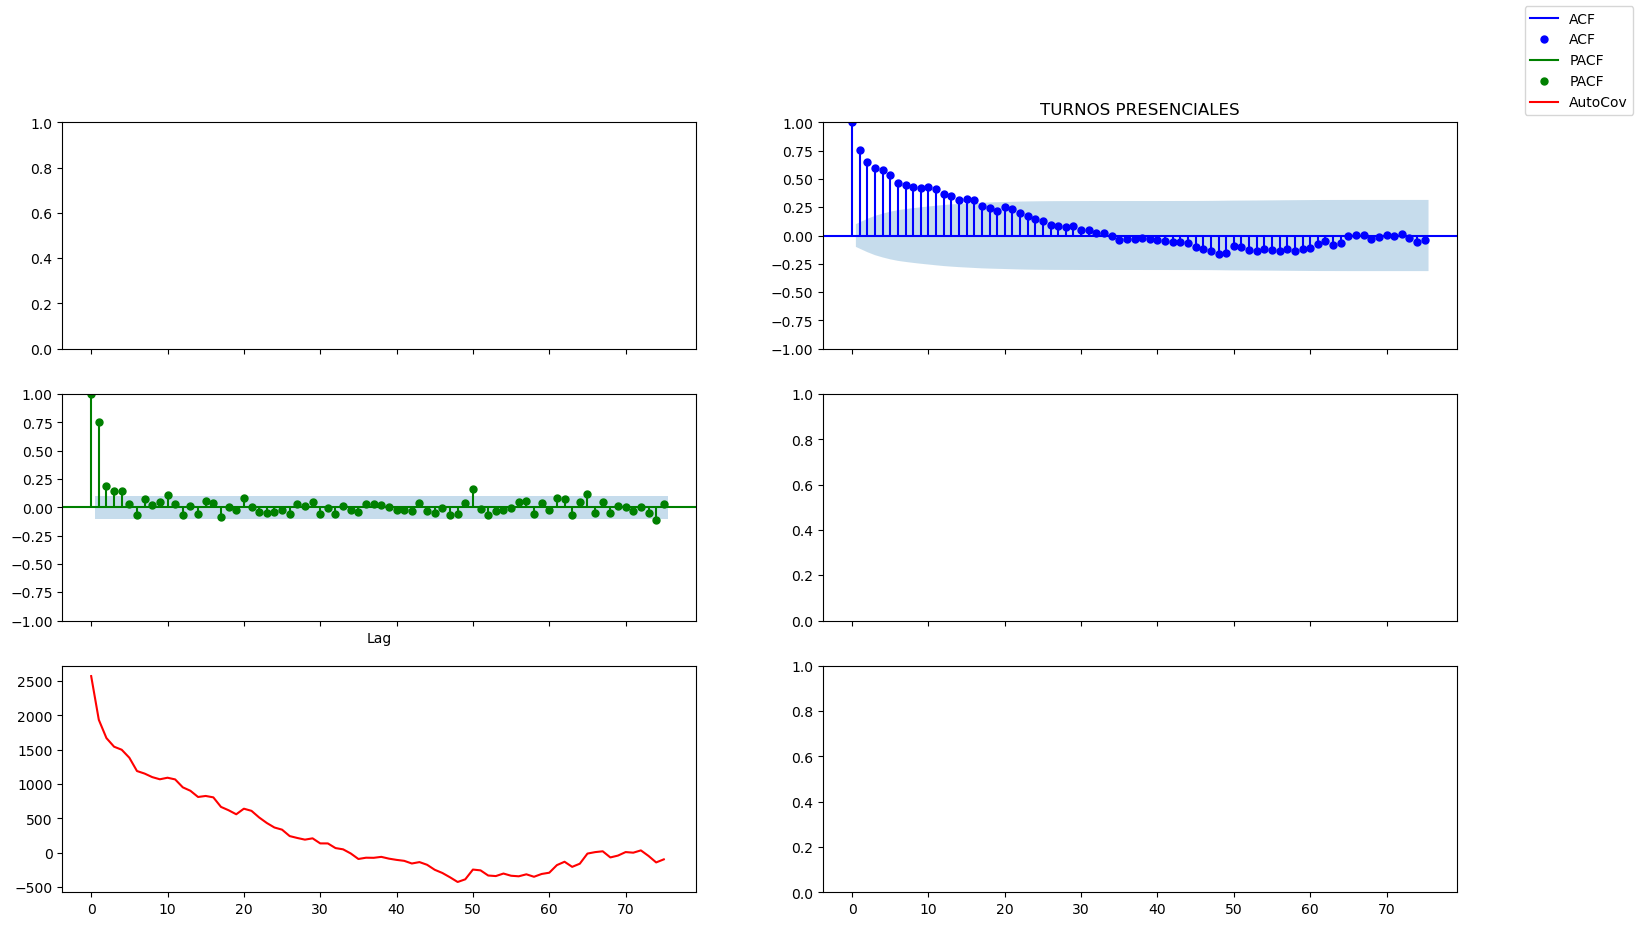

In [17]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.TP ,36)

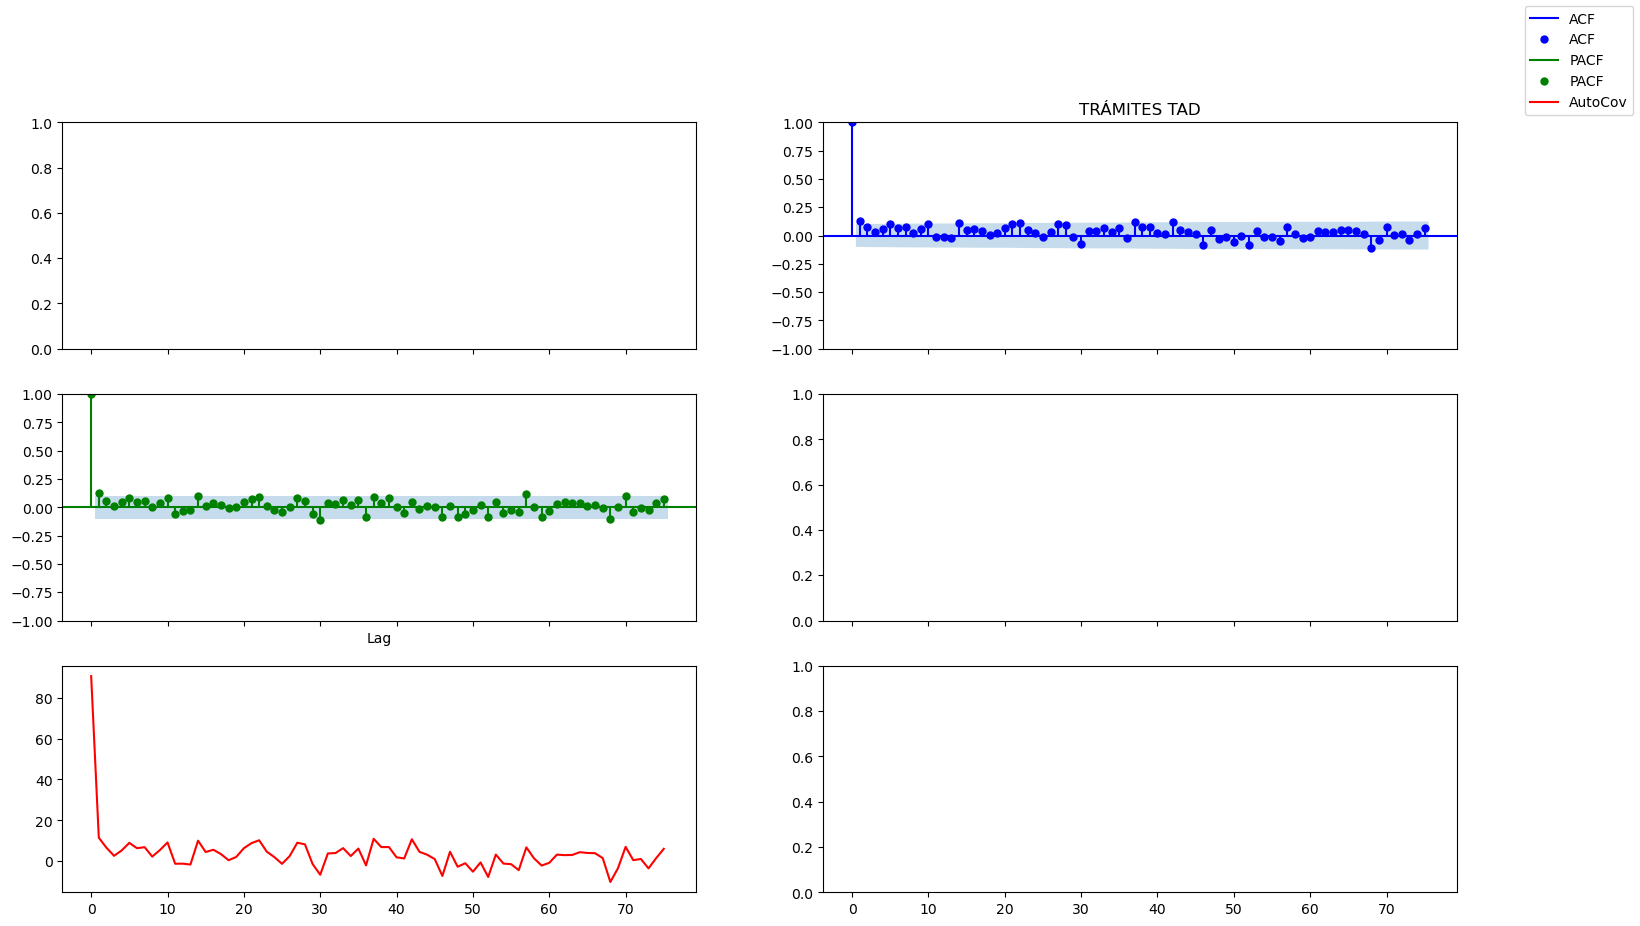

In [19]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.TAD ,36)

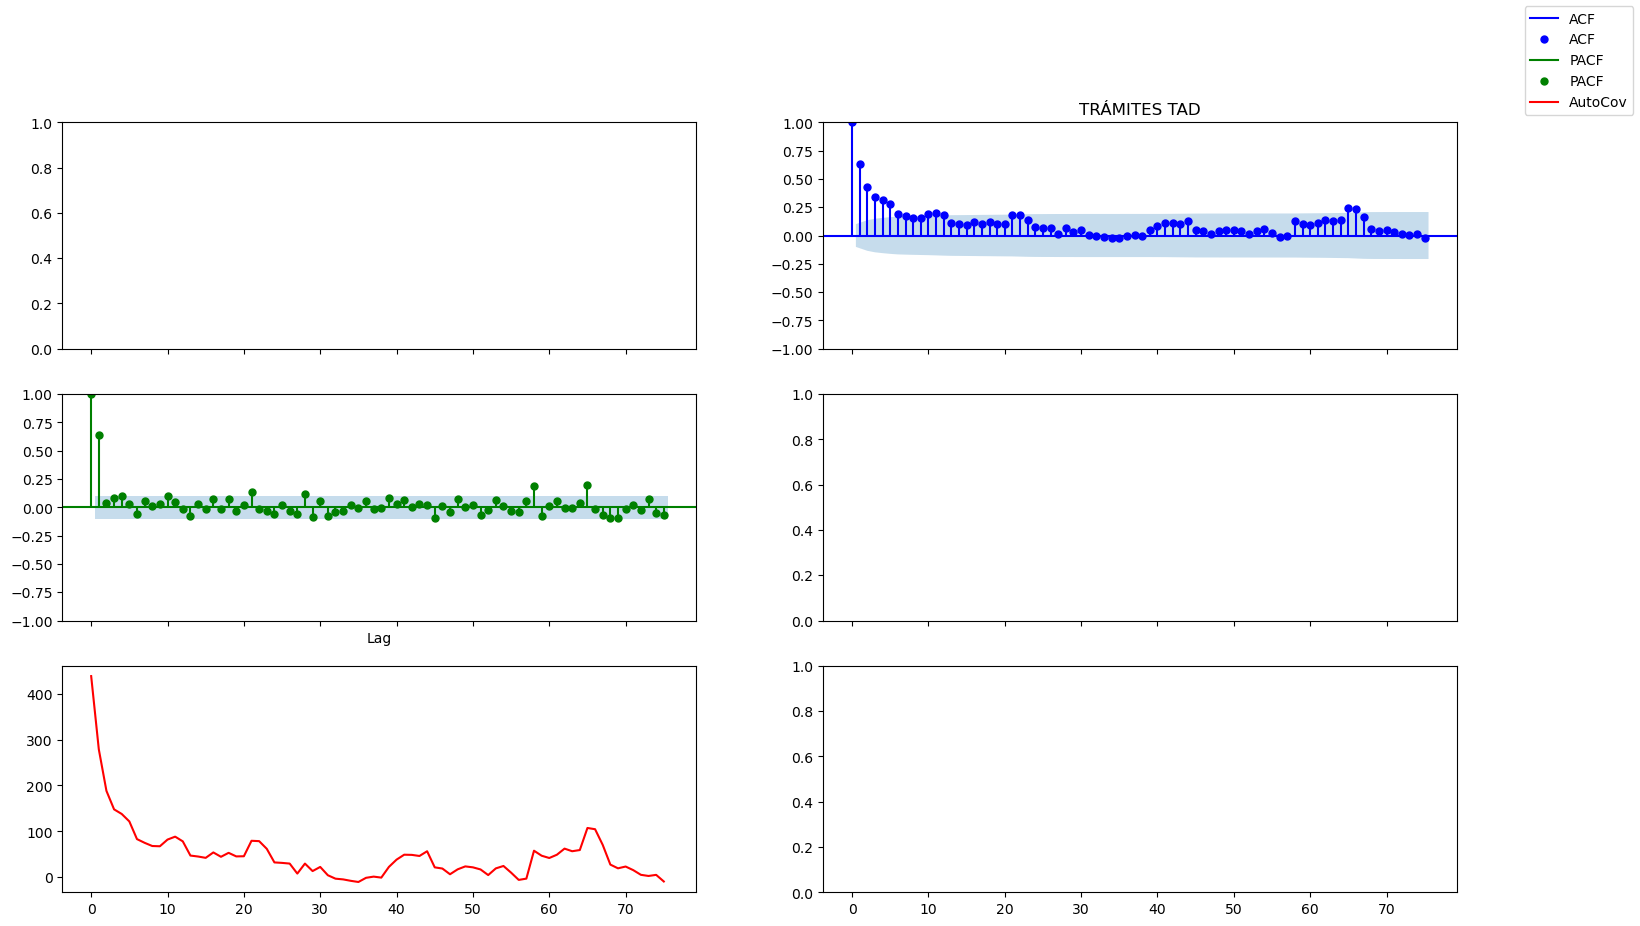

In [20]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.PP ,36)

---
---
## **4. Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias**

--- 
### **TEST de Dickey Fuller y Dickey Fuller Aumentado**

In [30]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.WAPP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.740535928304829,
 7.057244224841149e-05,
 4,
 375,
 {'1%': -3.447909006729481,
  '5%': -2.8692783343881483,
  '10%': -2.5708923751111112},
 2788.515168093619)

In [22]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.WAPP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.883945475189167,
 0.00033294838653415403,
 4,
 375,
 {'1%': -3.9831162986429627,
  '5%': -3.422262849758815,
  '10%': -3.1339732688355557},
 2788.8902354396946)

In [23]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.TP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.0569299632346985,
 0.0011400602877526264,
 3,
 376,
 {'1%': -3.4478619826418817,
  '5%': -2.869257669826291,
  '10%': -2.570881358363513},
 3549.28833475007)

In [24]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.TP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.142434044999484,
 0.00546004289009478,
 3,
 376,
 {'1%': -3.983050998155364,
  '5%': -3.4222313639905777,
  '10%': -3.133954779603869},
 3547.5415867306374)

In [25]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.TAD, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-17.138514061512453,
 7.07088646670841e-30,
 0,
 379,
 {'1%': -3.4477224095888497,
  '5%': -2.869196333125208,
  '10%': -2.5708486586002604},
 2656.1151525883392)

In [26]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.TAD, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-17.56046446442063,
 0.0,
 0,
 379,
 {'1%': -3.9828571817306773,
  '5%': -3.42213790916463,
  '10%': -3.1338998997509897},
 2649.3613062332806)

In [27]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.PP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-5.7023596551260685,
 7.624245950438387e-07,
 3,
 376,
 {'1%': -3.4478619826418817,
  '5%': -2.869257669826291,
  '10%': -2.570881358363513},
 3061.049576137924)

In [28]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.PP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-9.751820207913626,
 7.841814374851366e-15,
 0,
 379,
 {'1%': -3.9828571817306773,
  '5%': -3.42213790916463,
  '10%': -3.1338998997509897},
 3051.496575862138)

**RESUMEN TEST DICKEY FULLER:**
Son todas series estacionarias

----
### **TEST KPSS**

In [31]:
from statsmodels.tsa.stattools import kpss

In [32]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [33]:
kpss_test(data.WAPP) #data1.WAPP es la variable

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.2857467127776876
p-valor: 0.1
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.06194459823169601
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************



C:\Users\German\AppData\Local\Temp\ipykernel_15692\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\German\AppData\Local\Temp\ipykernel_15692\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


In [34]:
kpss_test(data.TP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.34283708625831805
p-valor: 0.1
numero de lags: 11
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.3016045427970026
p-valor: 0.01
numero de lags: 11
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\German\AppData\Local\Temp\ipykernel_15692\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\German\AppData\Local\Temp\ipykernel_15692\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


In [35]:
kpss_test(data.TAD)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9102855351700507
p-valor: 0.01
numero de lags: 5
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.13246296656194806
p-valor: 0.07506858044083692
numero de lags: 3
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\German\AppData\Local\Temp\ipykernel_15692\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


In [36]:
kpss_test(data.PP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9943505796524705
p-valor: 0.01
numero de lags: 9
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.09069697916612782
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\German\AppData\Local\Temp\ipykernel_15692\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\German\AppData\Local\Temp\ipykernel_15692\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


---
### **TEST PHILLIP PERRON** para evaluar estacionariedad

In [37]:
from arch.unitroot import PhillipsPerron

In [38]:
def Phillips_Perron(series, **k):

    params = {'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [39]:
Phillips_Perron(data.WAPP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -11.458632429535527
p-valor: 5.6254904173483205e-21
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -11.56216225318882
p-valor: 2.0951928951102932e-18
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Se valida con el test Phillip Perron que la serie WHATSAPP es estacionaria, y no hay que diferenciar

In [40]:
Phillips_Perron(data.TP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -8.459128653141804
p-valor: 1.584819356930798e-13
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -8.44402186725307
p-valor: 6.747770571477203e-12
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el test Phillip Terron, la serie TURNOS PRESENCIALES es estacionaria y no hay que hacer una diferenciación

In [41]:
Phillips_Perron(data.TAD)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -18.17045337464311
p-valor: 2.447811262062377e-30
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -17.98073467352686
p-valor: 0.0
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el TEST Phillip Terron la serie TAD  es estacionaria y no hay que aplicar una diferenciación.


In [42]:
Phillips_Perron(data.PP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -10.264481589979667
p-valor: 4.153642772298283e-18
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -10.331323435070532
p-valor: 4.692785152690824e-16
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el TEST Phillip Perron la serie PLAN DE PAGOS  es estacionaria y no hay que aplicar una diferenciación

**RESUMEN TEST PHILLIP PERRON:**
Todas las series son estacionarias según este test.

---
##### **CUADRO RESUMEN TESTS DE ESTACIONARIEDAD**



In [43]:
import pandas as pd
datatest = [
    ["Dickey Fuller", "si", "si", "si", "si"],
    ["Dickey Fuller Aumentado", "si", "si", "si", "si"],
    ["KPSS c", "si", "si", "no", "no"],
    ["KPSS t", "si", "no", "si", "si"],    
    ["Phillip Perron c", "si", "si", "si", "si"],
    ["Phillip Perron ct", "si", "si", "si", "si"]
]

# Encabezados de las columnas
headers = ["Test", "wapp", "tp", "tad", "pp"]

# Crear un DataFrame
df = pd.DataFrame(datatest, columns=headers)

# Mostrar el DataFrame
print(df)


                      Test wapp  tp tad  pp
0            Dickey Fuller   si  si  si  si
1  Dickey Fuller Aumentado   si  si  si  si
2                   KPSS c   si  si  no  no
3                   KPSS t   si  no  si  si
4         Phillip Perron c   si  si  si  si
5        Phillip Perron ct   si  si  si  si


Considerando el test de Dickey-Fuller Aumentado podemos determinar que las series son estacionarias.

---
### **NO HACER DIFERENCIACION**

---
---
## **5. Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual y global de los parámetros del modelo).**

**WAPP**

In [44]:
auto_arima(data.WAPP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3112.237, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2949.158, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2996.460, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3757.350, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2947.500, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=2949.197, Time=0.17 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=2950.306, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=2945.000, Time=0.08 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=2946.935, Time=0.27 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=2946.943, Time=0.12 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=2948.332, Time=0.52 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=2944.062, Time=0.15 sec
 ARIMA(3,0,0)(1,0,0)[7] intercept   : AIC=2946.057, Time=0.27 sec
 ARIMA(3,0,0)(0,0,1)[7] intercept   : AIC=2946.058, Time=0.24 sec
 ARIMA(3,0,0)(1,0,1)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  380
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1463.027
Date:                Fri, 10 Nov 2023   AIC                           2940.055
Time:                        17:44:10   BIC                           2967.636
Sample:                             0   HQIC                          2950.999
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.9984      1.341      5.966      0.000       5.371      10.626
ar.L1          0.5034      0.038     13.323      0.000       0.429       0.577
ar.L2          0.0514      0.045      1.133      0.257      -0.038       0.140
ar.L3          0.0278      0.042      0.654      0.513      -0.055       0.111
ar.L4          0.0462      0.047      0.983      0.325      -0.046       0.138
ar.L5          0.1076      0.054      2.006      0.045       0.002       0.213
sigma2       129.1180      6.381     20.233      0.000     116.611     141.625
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               517.48
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
modelo_sarima_WAPP = SARIMAX(data.WAPP, order=(5,0,0), seasonal_order=(0,0,0,7))
modelo_sarima_WAPP = modelo_sarima_WAPP.fit()
print(modelo_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  380
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1474.161
Date:                Fri, 10 Nov 2023   AIC                           2960.322
Time:                        17:44:58   BIC                           2983.963
Sample:                             0   HQIC                          2969.702
                                - 380                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5653      0.040     14.138      0.000       0.487       0.644
ar.L2          0.0870      0.046      1.872      0.061      -0.004       0.178
ar.L3          0.0627      0.044      1.442      0.1

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**TP**

In [48]:
auto_arima(data.TP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3783.506, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3752.239, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3723.048, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3781.509, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=3723.450, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=3723.486, Time=0.65 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=3723.392, Time=0.14 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=3724.291, Time=0.93 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=3785.424, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=3711.954, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=3710.266, Time=0.12 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=3712.010, Time=0.24 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  380
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1851.170
Date:                Fri, 10 Nov 2023   AIC                           3708.341
Time:                        17:45:51   BIC                           3720.153
Sample:                             0   HQIC                          3713.028
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3774      0.056      6.728      0.000       0.267       0.487
ma.L1         -0.8179      0.030    -27.593      0.000      -0.876      -0.760
sigma2      1021.9387     54.378     18.793      0.000     915.359    1128.518
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                61.87
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.38
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
modelo_sarima_TP = SARIMAX(data.TP, order=(1,1,1), seasonal_order=(0,0,0,7))
modelo_sarima_TP = modelo_sarima_TP.fit()
print(modelo_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  380
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1851.170
Date:                Fri, 10 Nov 2023   AIC                           3708.341
Time:                        17:46:47   BIC                           3720.153
Sample:                             0   HQIC                          3713.028
                                - 380                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3774      0.056      6.728      0.000       0.267       0.487
ma.L1         -0.8179      0.030    -27.593      0.000      -0.876      -0.760
sigma2      1021.9387     54.378     18.793      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**TAD**

In [51]:
auto_arima(data.TAD, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2997.127, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2908.684, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2785.269, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2995.138, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=2783.400, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=2785.252, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2783.763, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=2783.425, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=2783.504, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=2906.719, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=2785.377, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=2781.425, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=2783.283, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=2783.300, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[7]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  380
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1388.713
Date:                Fri, 10 Nov 2023   AIC                           2781.425
Time:                        17:47:07   BIC                           2789.300
Sample:                             0   HQIC                          2784.551
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9559      0.016    -59.467      0.000      -0.987      -0.924
sigma2        88.5845      5.034     17.599      0.000      78.719      98.450
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):                41.93
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.50
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
modelo_sarima_TAD = SARIMAX(data.TAD, order=(0,1,1), seasonal_order=(0,0,0,7))
modelo_sarima_TAD = modelo_sarima_TAD.fit()
print(modelo_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  380
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1388.713
Date:                Fri, 10 Nov 2023   AIC                           2781.425
Time:                        17:47:40   BIC                           2789.300
Sample:                             0   HQIC                          2784.551
                                - 380                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9559      0.016    -59.467      0.000      -0.987      -0.924
sigma2        88.5845      5.034     17.599      0.000      78.719      98.450
Ljung-Box (L1) (Q):                   2.02   Jarque-

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**PP**

In [53]:
auto_arima(data.PP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3265.837, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3251.428, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3232.818, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3263.837, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=3232.725, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=3232.975, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=3234.757, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=3205.548, Time=0.08 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=3205.973, Time=0.13 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=3205.912, Time=0.23 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=3207.907, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[7] intercept   : AIC=3197.327, Time=0.11 sec
 ARIMA(0,1,3)(1,0,0)[7] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  380
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1591.707
Date:                Fri, 10 Nov 2023   AIC                           3189.414
Time:                        17:48:07   BIC                           3201.227
Sample:                             0   HQIC                          3194.102
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5687      0.031     18.364      0.000       0.508       0.629
ma.L1         -0.9659      0.016    -59.907      0.000      -0.998      -0.934
sigma2       259.2177      5.251     49.365      0.000     248.926     269.509
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9745.27
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
modelo_sarima_PP = SARIMAX(data.PP, order=(1,1,1), seasonal_order=(0,0,0,7))
modelo_sarima_PP = modelo_sarima_PP.fit()
print(modelo_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  380
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1591.707
Date:                Fri, 10 Nov 2023   AIC                           3189.414
Time:                        17:48:29   BIC                           3201.227
Sample:                             0   HQIC                          3194.102
                                - 380                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5687      0.031     18.364      0.000       0.508       0.629
ma.L1         -0.9659      0.016    -59.907      0.000      -0.998      -0.934
sigma2       259.2177      5.251     49.365      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


---
## **6. Evaluar alguna métrica de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set.**

**WHATSAPP**

In [55]:
# Seleccionamos el primer 75% para train
train_WAPP = data.WAPP.iloc[:round(len(data.WAPP)*.75)]
# Seleccionamos el 25% restante para test
test_WAPP = data.WAPP.iloc[round(len(data.WAPP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_WAPP, test_WAPP)

FECHA
2022-03-15    19
2022-03-16    12
2022-03-17    14
2022-03-18    67
2022-03-21    45
              ..
2023-05-08    28
2023-05-09    23
2023-05-10    28
2023-05-11    16
2023-05-12    18
Name: WAPP, Length: 285, dtype: int64 FECHA
2023-05-15    24
2023-05-16    19
2023-05-17    17
2023-05-18    17
2023-05-19    15
              ..
2023-09-25    20
2023-09-26    13
2023-09-27    17
2023-09-28    26
2023-09-29    12
Name: WAPP, Length: 95, dtype: int64


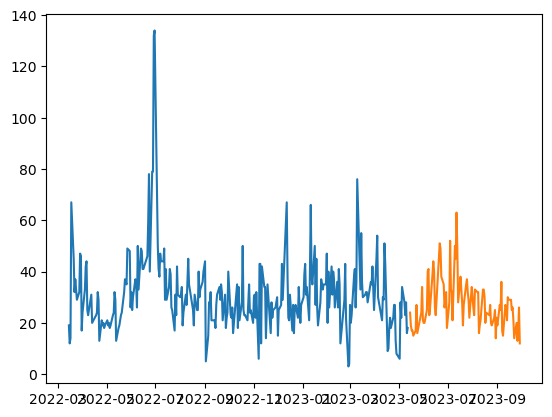

In [56]:
plt.plot(train_WAPP)
plt.plot(test_WAPP)

In [57]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_WAPP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2378.215, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2254.170, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2290.645, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2841.201, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2253.257, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=2254.211, Time=0.15 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=2255.749, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=2251.125, Time=0.09 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=2252.478, Time=0.20 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=2252.501, Time=0.20 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=2254.113, Time=0.44 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=2251.419, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=2248.271, Time=0.22 sec
 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=2250.237, Time=0.46 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  285
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1119.135
Date:                Fri, 10 Nov 2023   AIC                           2248.271
Time:                        17:50:01   BIC                           2266.533
Sample:                             0   HQIC                          2255.591
                                - 285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3346      2.438      0.957      0.338      -2.444       7.114
ar.L1          1.2119      0.222      5.461      0.000       0.777       1.647
ar.L2         -0.2866      0.148     -1.937      0.053      -0.577       0.003
ma.L1         -0.7099      0.216     -3.293      0.001      -1.132      -0.287
sigma2       150.4786      7.786     19.328      0.000     135.219     165.738
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               359.65
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             1.14
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
modelo_sarima_WAPP = SARIMAX(train_WAPP, order=(2,0,1), seasonal_order=(0,0,0,7))
result_sarima_WAPP = modelo_sarima_WAPP.fit()
print(result_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  285
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1124.763
Date:                Fri, 10 Nov 2023   AIC                           2257.526
Time:                        17:50:44   BIC                           2272.136
Sample:                             0   HQIC                          2263.383
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4059      0.068     20.795      0.000       1.273       1.538
ar.L2         -0.4087      0.066     -6.182      0.000      -0.538      -0.279
ma.L1         -0.8599      0.037    -23.296      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [59]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [60]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP = result_sarima_WAPP.get_forecast(len(test_WAPP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [61]:
predicciones_WAPP = result_sarima_WAPP.get_forecast(95)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [62]:
WAPP_pred = predicciones_sarima_WAPP.predicted_mean
WAPP_int = predicciones_sarima_WAPP.conf_int()

In [63]:
WAPP_pred.index = test_WAPP.index
WAPP_int.index = test_WAPP.index

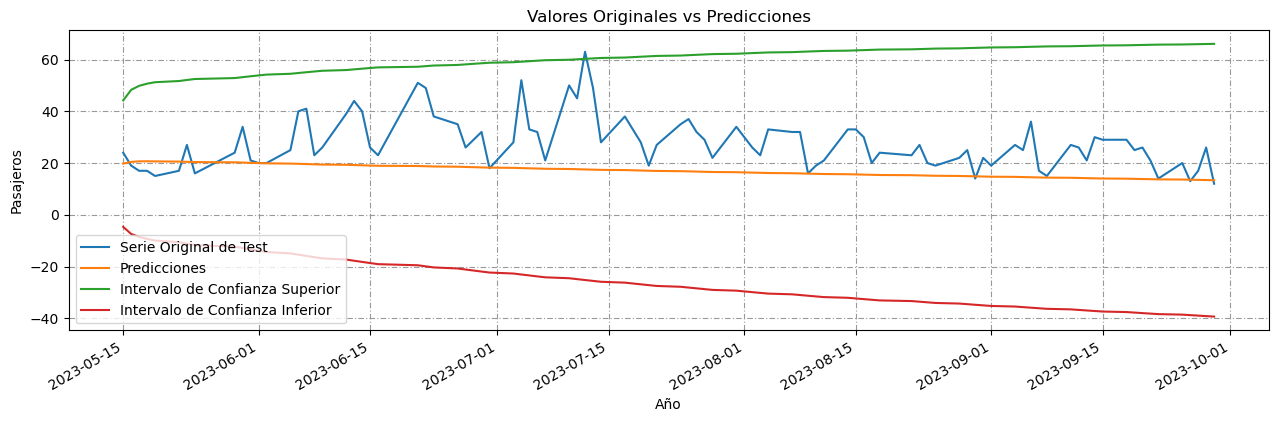

In [64]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_WAPP, WAPP_pred, WAPP_int)

In [65]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [66]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP.predicted_mean)

MSE: 206.58574410016521
MAE: 11.312341643221604
RMSE: 14.373090972374913
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TURNOS PRESENCIALES**

In [67]:
# Seleccionamos el primer 75% para train
train_TP = data.TP.iloc[:round(len(data.TP)*.75)]
# Seleccionamos el 25% restante para test
test_TP = data.TP.iloc[round(len(data.TP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_TP, test_TP)

FECHA
2022-03-15     78
2022-03-16     70
2022-03-17     66
2022-03-18     50
2022-03-21     65
             ... 
2023-05-08    158
2023-05-09    179
2023-05-10    132
2023-05-11    169
2023-05-12    169
Name: TP, Length: 285, dtype: int64 FECHA
2023-05-15    188
2023-05-16    151
2023-05-17    137
2023-05-18    162
2023-05-19    132
             ... 
2023-09-25    112
2023-09-26    118
2023-09-27    108
2023-09-28    111
2023-09-29    116
Name: TP, Length: 95, dtype: int64


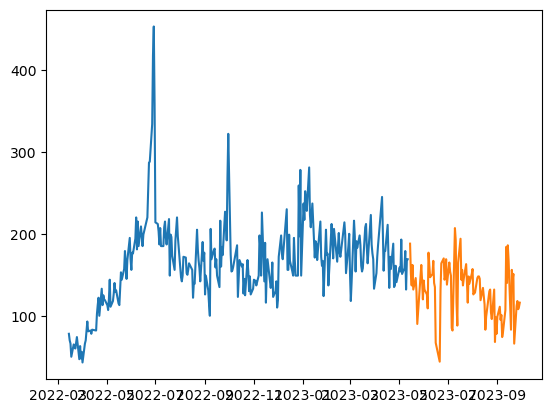

In [68]:
plt.plot(train_TP)
plt.plot(test_TP)

In [69]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_TP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2834.211, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2807.119, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2791.745, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2832.234, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=2791.949, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2793.490, Time=0.26 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=2793.154, Time=0.44 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=2791.991, Time=0.13 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=2794.754, Time=0.53 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=2836.079, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=2788.237, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=2787.362, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=2788.411, Time=0.15 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  285
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1389.810
Date:                Fri, 10 Nov 2023   AIC                           2785.620
Time:                        17:53:03   BIC                           2796.567
Sample:                             0   HQIC                          2790.008
                                - 285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.066      5.580      0.000       0.239       0.498
ma.L1         -0.7794      0.038    -20.592      0.000      -0.854      -0.705
sigma2      1041.1599     63.114     16.496      0.000     917.458    1164.861
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                53.68
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.27
Prob(H) (two-sided):                  0.72   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
modelo_sarima_TP = SARIMAX(train_TP, order=(1,1,1), seasonal_order=(0,0,0,7))
result_sarima_TP = modelo_sarima_TP.fit()
print(result_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  285
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1389.810
Date:                Fri, 10 Nov 2023   AIC                           2785.620
Time:                        17:53:20   BIC                           2796.567
Sample:                             0   HQIC                          2790.008
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.066      5.580      0.000       0.239       0.498
ma.L1         -0.7794      0.038    -20.592      0.000      -0.854      -0.705
sigma2      1041.1599     63.114     16.496      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [71]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [72]:
# Utilizando el modelo realizamos la prediccion correspondiente
predicciones_sarima_TP = result_sarima_TP.get_forecast(len(test_TP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [73]:
predicciones_TP = result_sarima_TP.get_forecast(95)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [74]:
TP_pred = predicciones_sarima_TP.predicted_mean
TP_int = predicciones_sarima_TP.conf_int()

In [75]:
TP_pred.index = test_TP.index
TP_int.index = test_TP.index

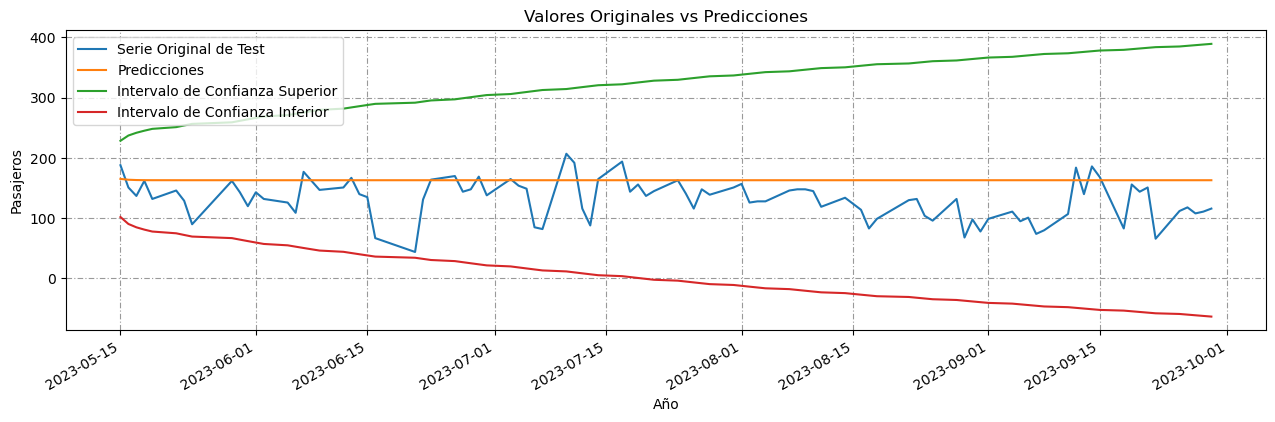

In [76]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TP, TP_pred, TP_int)

In [77]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [78]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP.predicted_mean)

MSE: 2019.4337880964642
MAE: 35.88290148886284
RMSE: 44.93811064226515
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TRÁMITES**

In [80]:
# Seleccionamos el primer 75% para train
train_TAD = data.TAD.iloc[:round(len(data.TAD)*.75)]
# Seleccionamos el 25% restante para test
test_TAD = data.TAD.iloc[round(len(data.TAD)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_TAD, test_TAD)

FECHA
2022-03-15    53
2022-03-16    26
2022-03-17    41
2022-03-18    20
2022-03-21    44
              ..
2023-05-08    43
2023-05-09    38
2023-05-10    29
2023-05-11    42
2023-05-12    33
Name: TAD, Length: 285, dtype: int64 FECHA
2023-05-15    41
2023-05-16    53
2023-05-17    48
2023-05-18    48
2023-05-19    31
              ..
2023-09-25    38
2023-09-26    42
2023-09-27    42
2023-09-28    40
2023-09-29    27
Name: TAD, Length: 95, dtype: int64


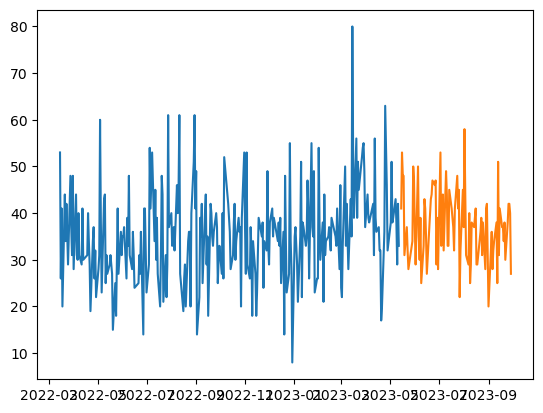

In [81]:
plt.plot(train_TAD)
plt.plot(test_TAD)

In [82]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_TAD, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2276.279, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2209.855, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2120.566, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2274.287, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=2118.616, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=2120.559, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2120.003, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=2118.720, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=2207.862, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=2117.158, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=2119.130, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=2119.134, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  285
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1056.579
Date:                Fri, 10 Nov 2023   AIC                           2117.158
Time:                        17:54:40   BIC                           2124.456
Sample:                             0   HQIC                          2120.084
                                - 285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9537      0.020    -48.883      0.000      -0.992      -0.915
sigma2        98.9267      6.484     15.256      0.000      86.218     111.636
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):                31.07
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.52
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
modelo_sarima_TAD = SARIMAX(train_TAD, order=(0,1,1), seasonal_order=(0,0,0,7))
result_sarima_TAD = modelo_sarima_TAD.fit()
print(result_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  285
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1056.579
Date:                Fri, 10 Nov 2023   AIC                           2117.158
Time:                        17:54:59   BIC                           2124.456
Sample:                             0   HQIC                          2120.084
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9537      0.020    -48.883      0.000      -0.992      -0.915
sigma2        98.9267      6.484     15.256      0.000      86.218     111.636
Ljung-Box (L1) (Q):                   1.73   Jarque-

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [84]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [85]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD = result_sarima_TAD.get_forecast(len(test_TAD))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [86]:
predicciones_TAD = result_sarima_TAD.get_forecast(95)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [87]:
TAD_pred = predicciones_sarima_TAD.predicted_mean
TAD_int = predicciones_sarima_TAD.conf_int()

In [88]:
TAD_pred.index = test_TAD.index
TAD_int.index = test_TAD.index

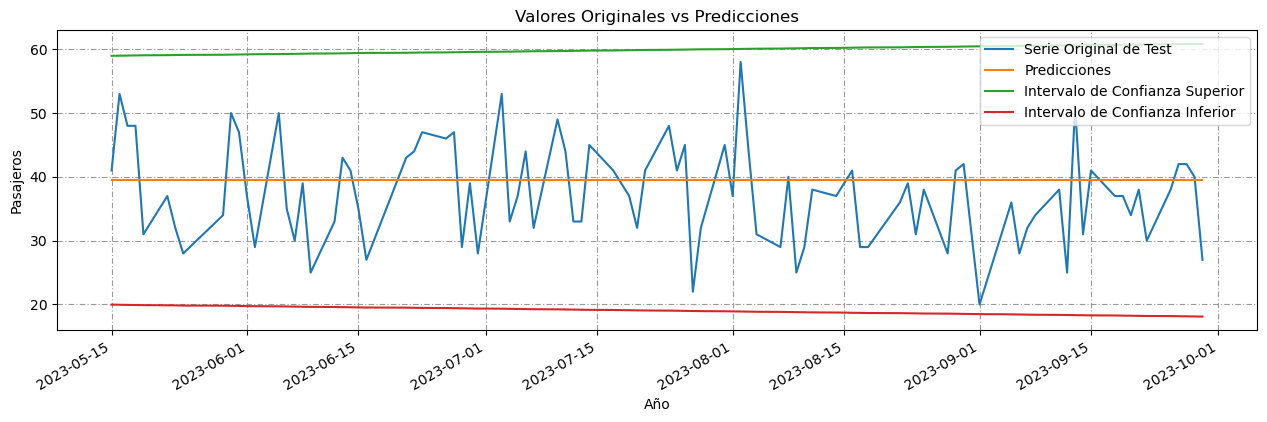

In [89]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TAD, TAD_pred, TAD_int)

In [90]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [91]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD.predicted_mean)

MSE: 61.969372467373525
MAE: 6.451577440778524
RMSE: 7.872062783500493
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**PLANES DE PAGO**

In [92]:
# Seleccionamos el primer 75% para train
train_PP = data.PP.iloc[:round(len(data.PP)*.75)]
# Seleccionamos el 25% restante para test
test_PP = data.PP.iloc[round(len(data.PP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_PP, test_PP)

FECHA
2022-03-15     9
2022-03-16    12
2022-03-17    14
2022-03-18     9
2022-03-21     8
              ..
2023-05-08    18
2023-05-09    12
2023-05-10    11
2023-05-11    14
2023-05-12    17
Name: PP, Length: 285, dtype: int64 FECHA
2023-05-15    24
2023-05-16    11
2023-05-17    12
2023-05-18    31
2023-05-19     7
              ..
2023-09-25    12
2023-09-26     6
2023-09-27     6
2023-09-28    10
2023-09-29     9
Name: PP, Length: 95, dtype: int64


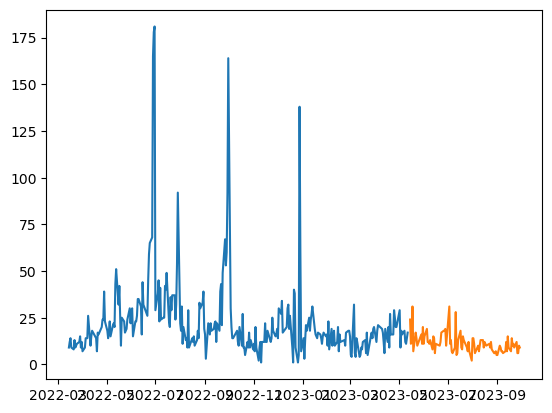

In [93]:
plt.plot(train_PP)
plt.plot(test_PP)

In [94]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_PP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2519.718, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2511.156, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2498.718, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2517.719, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=2498.066, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=2498.820, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2500.680, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=2478.079, Time=0.07 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=2478.802, Time=0.13 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=2478.760, Time=0.16 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=2480.758, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[7] intercept   : AIC=2471.555, Time=0.12 sec
 ARIMA(0,1,3)(1,0,0)[7] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  285
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1229.413
Date:                Fri, 10 Nov 2023   AIC                           2464.825
Time:                        17:56:22   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1363      8.871     37.777      0.000     317.749     352.524
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4364.94
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             1.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
modelo_sarima_PP = SARIMAX(train_PP, order=(1,1,1), seasonal_order=(0,0,0,7))
result_sarima_PP = modelo_sarima_PP.fit()
print(result_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  285
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1229.413
Date:                Fri, 10 Nov 2023   AIC                           2464.825
Time:                        17:56:38   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1363      8.871     37.777      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [96]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [97]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP = result_sarima_PP.get_forecast(len(test_PP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [98]:
predicciones_PP = result_sarima_PP.get_forecast(95)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [99]:
PP_pred = predicciones_sarima_PP.predicted_mean
PP_int = predicciones_sarima_PP.conf_int()

In [100]:
PP_pred.index = test_PP.index
PP_int.index = test_PP.index

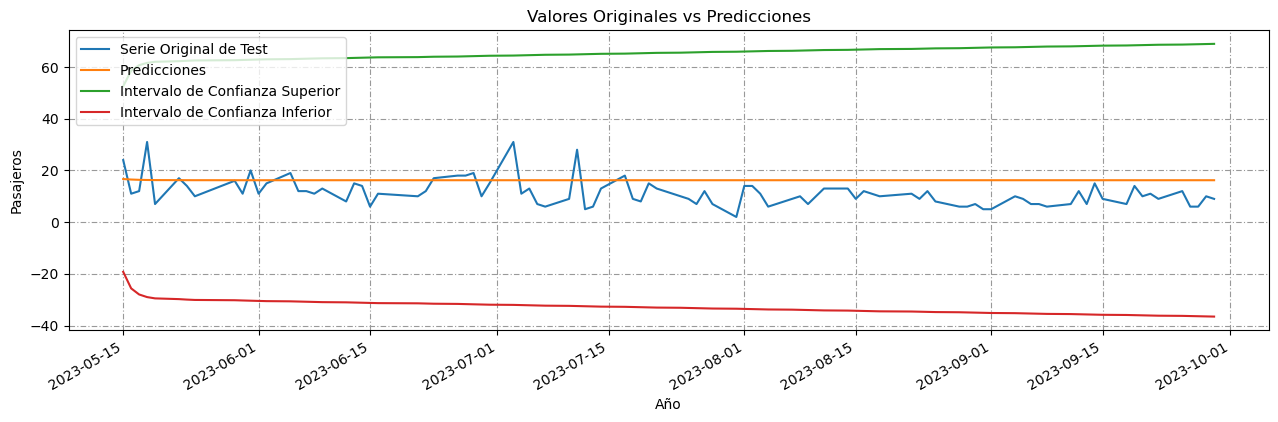

In [101]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_PP, PP_pred, PP_int)

In [102]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [103]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP.predicted_mean)

MSE: 50.08299654690621
MAE: 6.231311084790318
RMSE: 7.076934120571295
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


---
## **7. Detallar una comparación con otros modelos estimados.**

**WAPP**

**WAPP1**

In [104]:
modelo_sarima_WAPP1 = SARIMAX(train_WAPP, order=(1,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP1 = modelo_sarima_WAPP1.fit()
print(result_sarima_WAPP1.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  285
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1126.288
Date:                Fri, 10 Nov 2023   AIC                           2260.577
Time:                        17:57:15   BIC                           2275.186
Sample:                             0   HQIC                          2266.433
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9914      0.008    117.670      0.000       0.975       1.008
ma.L1         -0.4669      0.043    -10.868      0.000      -0.551      -0.383
ma.L2         -0.2076      0.044     -4.683      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [105]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP1 = result_sarima_WAPP1.get_forecast(len(test_WAPP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [106]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [107]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP1.predicted_mean)

MSE: 276.78992154385475
MAE: 13.932614875741663
RMSE: 16.637004584475378
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**WAPP2**

In [112]:
modelo_sarima_WAPP2 = SARIMAX(train_WAPP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_WAPP2 = modelo_sarima_WAPP2.fit()
print(result_sarima_WAPP2.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  285
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1131.863
Date:                Fri, 10 Nov 2023   AIC                           2269.725
Time:                        18:01:02   BIC                           2280.683
Sample:                             0   HQIC                          2274.118
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9814      0.009    114.958      0.000       0.965       0.998
ma.L1         -0.5149      0.040    -13.016      0.000      -0.592      -0.437
sigma2       163.5778      7.606     21.506      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [113]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP2 = result_sarima_WAPP2.get_forecast(len(test_WAPP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [114]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [115]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP2.predicted_mean)

MSE: 454.2545135077929
MAE: 18.84199548998646
RMSE: 21.313247371242912
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TP1**

In [117]:
modelo_sarima_TP1 = SARIMAX(train_TP, order=(2,1,1), seasonal_order=(0,0,0,7))
result_sarima_TP1 = modelo_sarima_TP1.fit()
print(result_sarima_TP1.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  285
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1389.022
Date:                Fri, 10 Nov 2023   AIC                           2786.044
Time:                        18:02:10   BIC                           2800.639
Sample:                             0   HQIC                          2791.895
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4234      0.079      5.382      0.000       0.269       0.578
ar.L2          0.0977      0.069      1.408      0.159      -0.038       0.234
ma.L1         -0.8548      0.062    -13.839      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [118]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP1 = result_sarima_TP1.get_forecast(len(test_TP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [119]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [120]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP1.predicted_mean)

MSE: 2059.4686044684427
MAE: 36.34095981023701
RMSE: 45.38136847284844
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TP2**

In [121]:
modelo_sarima_TP2 = SARIMAX(train_TP, order=(1,1,2), seasonal_order=(0,0,0,7))
result_sarima_TP2 = modelo_sarima_TP2.fit()
print(result_sarima_TP2.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  285
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1388.828
Date:                Fri, 10 Nov 2023   AIC                           2785.657
Time:                        18:02:44   BIC                           2800.253
Sample:                             0   HQIC                          2791.509
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6987      0.175      3.991      0.000       0.356       1.042
ma.L1         -1.1378      0.184     -6.195      0.000      -1.498      -0.778
ma.L2          0.2242      0.118      1.906      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [122]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP2 = result_sarima_TP2.get_forecast(len(test_TP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [123]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [124]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP2.predicted_mean)

MSE: 2087.3974696951486
MAE: 36.65273187797017
RMSE: 45.68804515073006
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TAD1**

In [125]:
modelo_sarima_TAD1 = SARIMAX(train_TAD, order=(1,1,1), seasonal_order=(0,0,0,7))
result_sarima_TAD1 = modelo_sarima_TAD1.fit()
print(result_sarima_TAD1.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  285
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1055.744
Date:                Fri, 10 Nov 2023   AIC                           2117.488
Time:                        18:03:21   BIC                           2128.435
Sample:                             0   HQIC                          2121.877
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0817      0.067      1.223      0.221      -0.049       0.213
ma.L1         -0.9636      0.019    -50.912      0.000      -1.001      -0.926
sigma2        98.3183      6.429     15.293      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [126]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD1 = result_sarima_TAD1.get_forecast(len(test_TAD))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [127]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [128]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD1.predicted_mean)

MSE: 61.30614854036352
MAE: 6.416352449988002
RMSE: 7.829824298179591
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TAD2**

In [129]:
modelo_sarima_TAD2 = SARIMAX(train_TAD, order=(1,1,0), seasonal_order=(0,0,0,7))
result_sarima_TAD2 = modelo_sarima_TAD2.fit()
print(result_sarima_TAD2.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  285
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1100.933
Date:                Fri, 10 Nov 2023   AIC                           2205.866
Time:                        18:04:02   BIC                           2213.164
Sample:                             0   HQIC                          2208.792
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4716      0.052     -9.079      0.000      -0.573      -0.370
sigma2       136.2215     10.211     13.341      0.000     116.208     156.235
Ljung-Box (L1) (Q):                   4.91   Jarque-

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [130]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD2 = result_sarima_TAD2.get_forecast(len(test_TAD))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [131]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [132]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD2.predicted_mean)

MSE: 59.590107397962726
MAE: 6.3179463606906525
RMSE: 7.719462895691819
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**PP1**

In [133]:
modelo_sarima_PP1 = SARIMAX(train_PP, order=(2,1,1), seasonal_order=(0,0,0,7))
result_sarima_PP1 = modelo_sarima_PP1.fit()
print(result_sarima_PP1.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  285
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1229.412
Date:                Fri, 10 Nov 2023   AIC                           2466.824
Time:                        18:04:37   BIC                           2481.420
Sample:                             0   HQIC                          2472.676
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5822      0.041     14.203      0.000       0.502       0.663
ar.L2         -0.0021      0.044     -0.048      0.962      -0.088       0.084
ma.L1         -0.9682      0.023    -41.338      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [134]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP1 = result_sarima_PP1.get_forecast(len(test_PP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [135]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [136]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP1.predicted_mean)

MSE: 50.00281805220424
MAE: 6.225180095841077
RMSE: 7.071267075440175
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**PP2**

In [137]:
modelo_sarima_PP2 = SARIMAX(train_PP, order=(1,1,2), seasonal_order=(0,0,0,7))
result_sarima_PP2 = modelo_sarima_PP2.fit()
print(result_sarima_PP2.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  285
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1229.412
Date:                Fri, 10 Nov 2023   AIC                           2466.824
Time:                        18:05:06   BIC                           2481.420
Sample:                             0   HQIC                          2472.676
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5778      0.075      7.698      0.000       0.431       0.725
ma.L1         -0.9635      0.089    -10.808      0.000      -1.138      -0.789
ma.L2         -0.0044      0.073     -0.060      0.9

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [138]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP2 = result_sarima_PP2.get_forecast(len(test_PP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [139]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [140]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP2.predicted_mean)

MSE: 49.979752126712555
MAE: 6.223413232632411
RMSE: 7.069635926036966
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\4003564509.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**COMPARACIÓN DE MODELOS**

In [141]:
datos = {'Modelos': ['WAPP','WAPP1','WAPP2'],
         'AIC': [result_sarima_WAPP.aic, result_sarima_WAPP1.aic, result_sarima_WAPP2.aic ],
         'BIC': [result_sarima_WAPP.bic, result_sarima_WAPP1.bic, result_sarima_WAPP2.bic],
         'MAE': [result_sarima_WAPP.mse, result_sarima_WAPP1.mse, result_sarima_WAPP2.mse],
         'MSE': [result_sarima_WAPP.mae, result_sarima_WAPP1.mae, result_sarima_WAPP2.mae],
         'RMSE': [result_sarima_WAPP.rmse, modelo_sarima_WAPP1.rmse, modelo_sarima_WAPP2.rmse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

AttributeError: 'SARIMAXResults' object has no attribute 'rmse'

---
## **8. Efectuar un Análisis de Diagnóstico de las series temporales (Análisis sobre los Residuos del modelo, análisis gráfico de FAC, test de Ljung-Box, etc.).**

**EVALUACIÓN DE RESIDUOS**

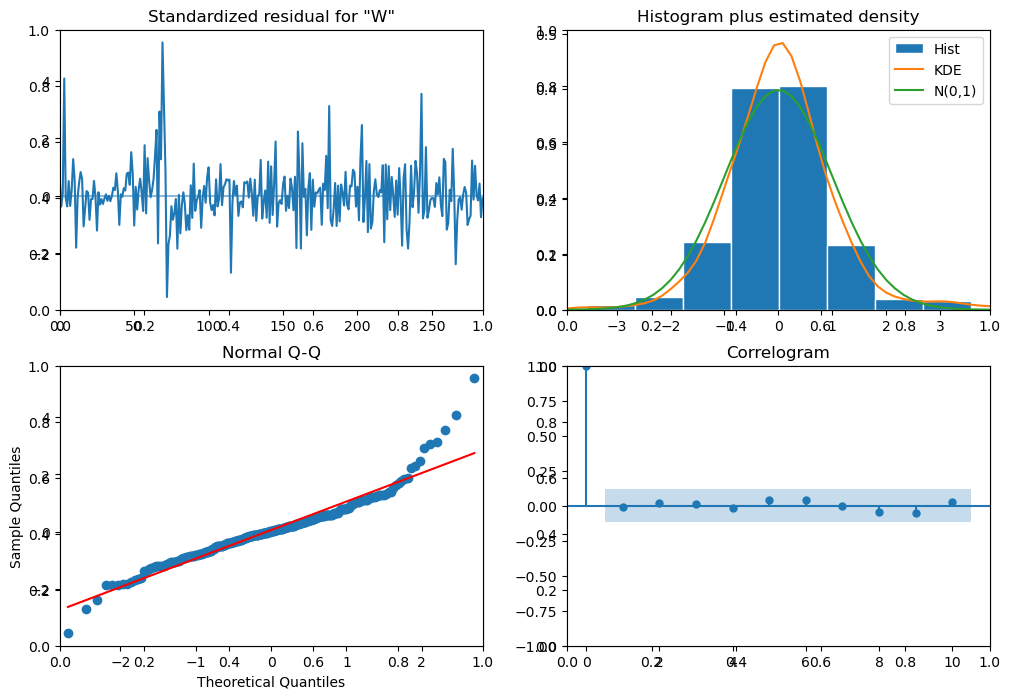

In [142]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP.plot_diagnostics(fig=fig)
plt.show()

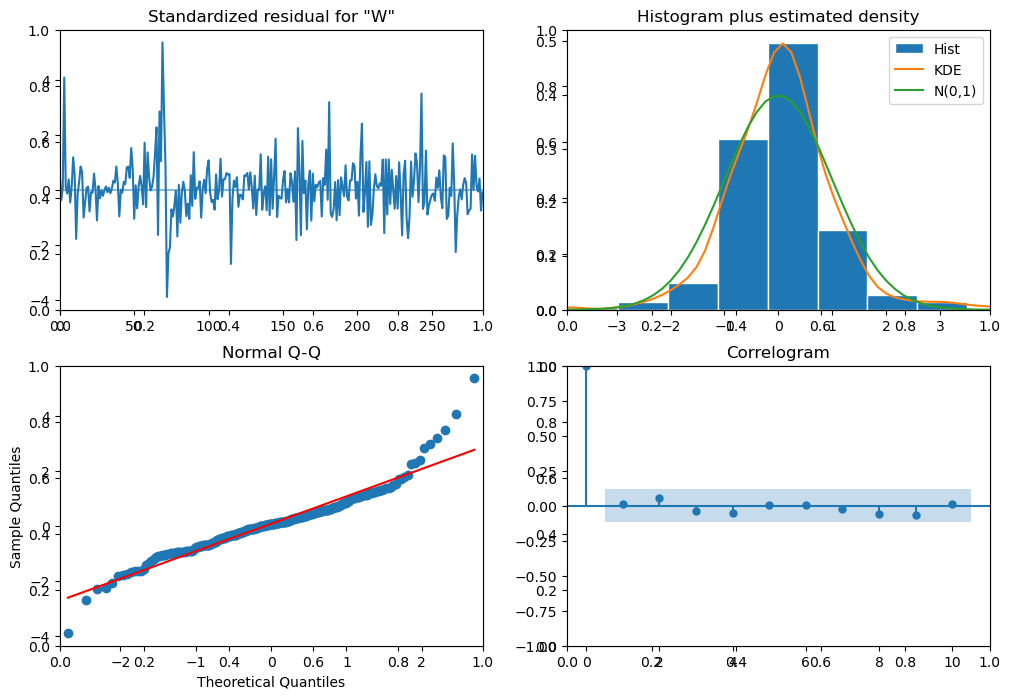

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP1.plot_diagnostics(fig=fig)
plt.show()

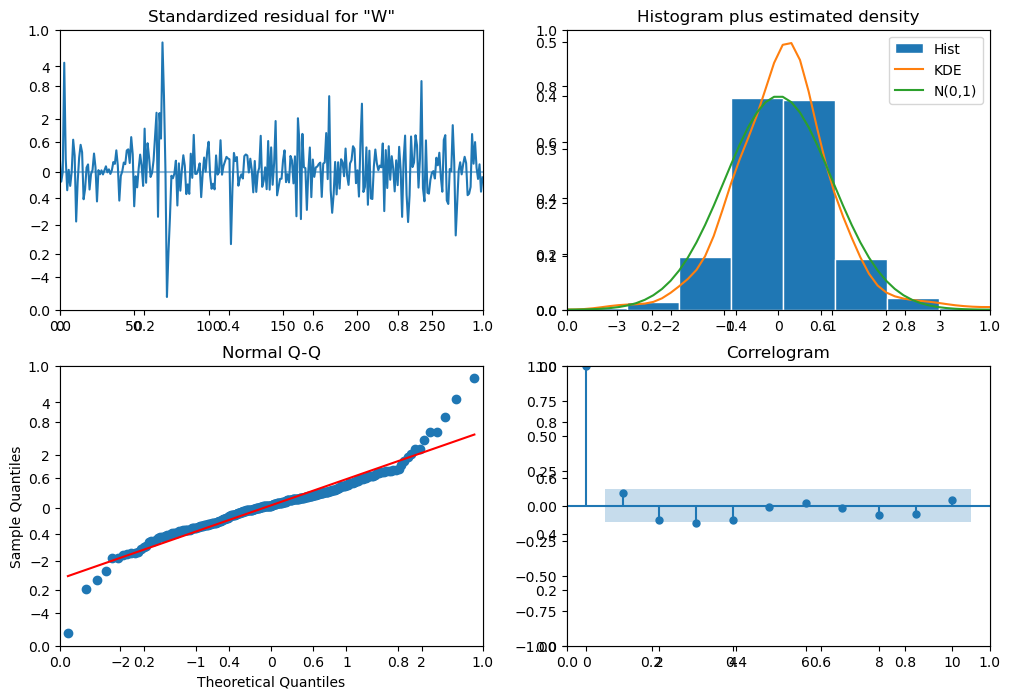

In [144]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP2.plot_diagnostics(fig=fig)
plt.show()

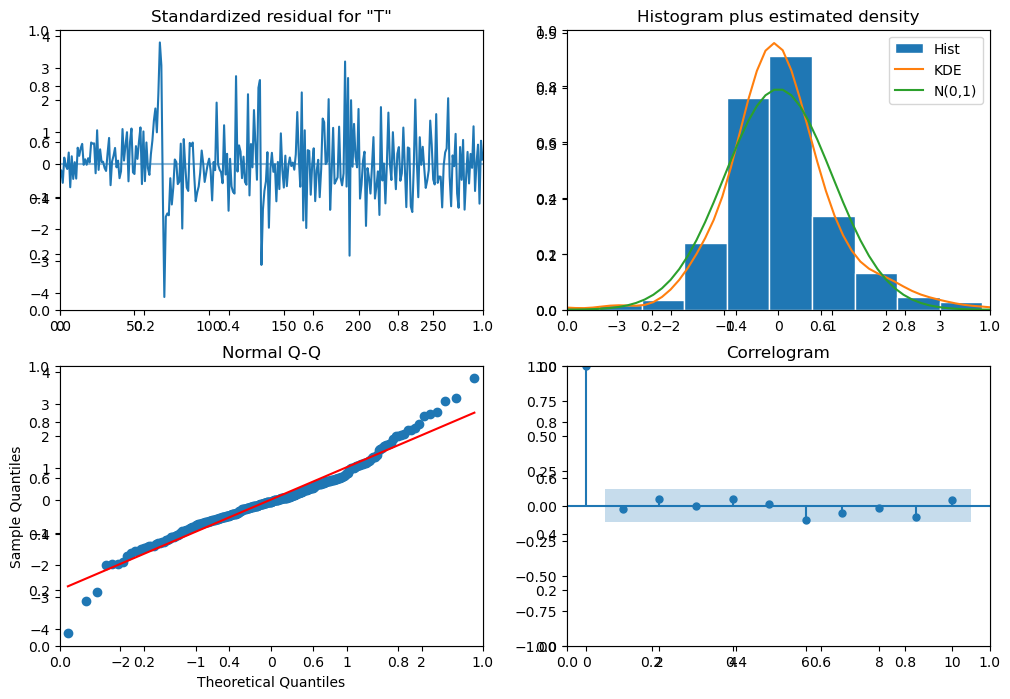

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP.plot_diagnostics(fig=fig)
plt.show()

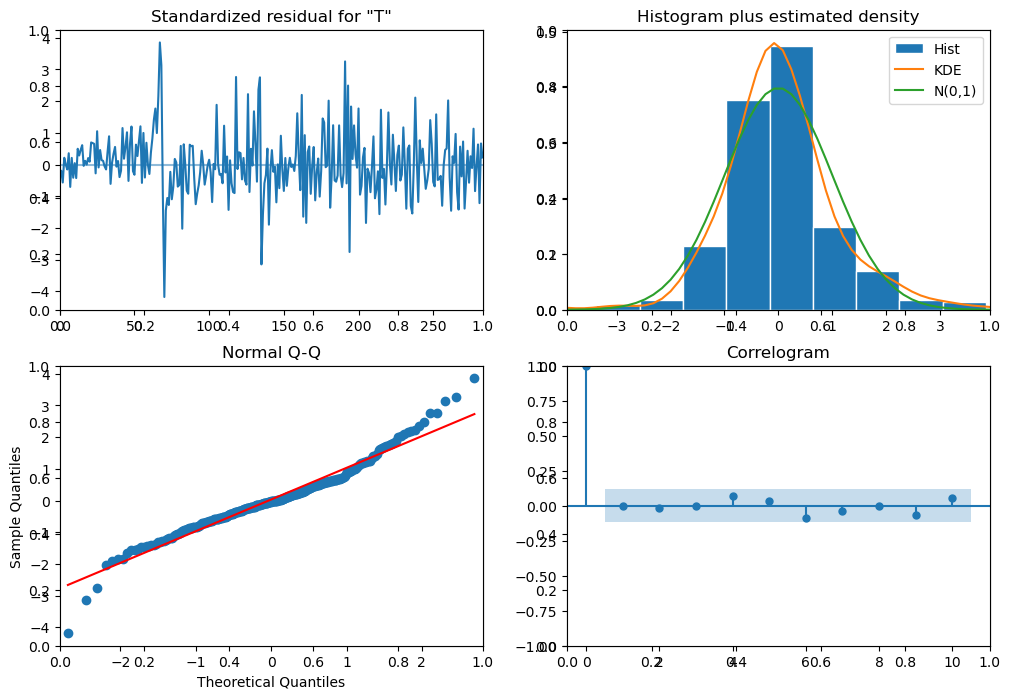

In [146]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP1.plot_diagnostics(fig=fig)
plt.show()

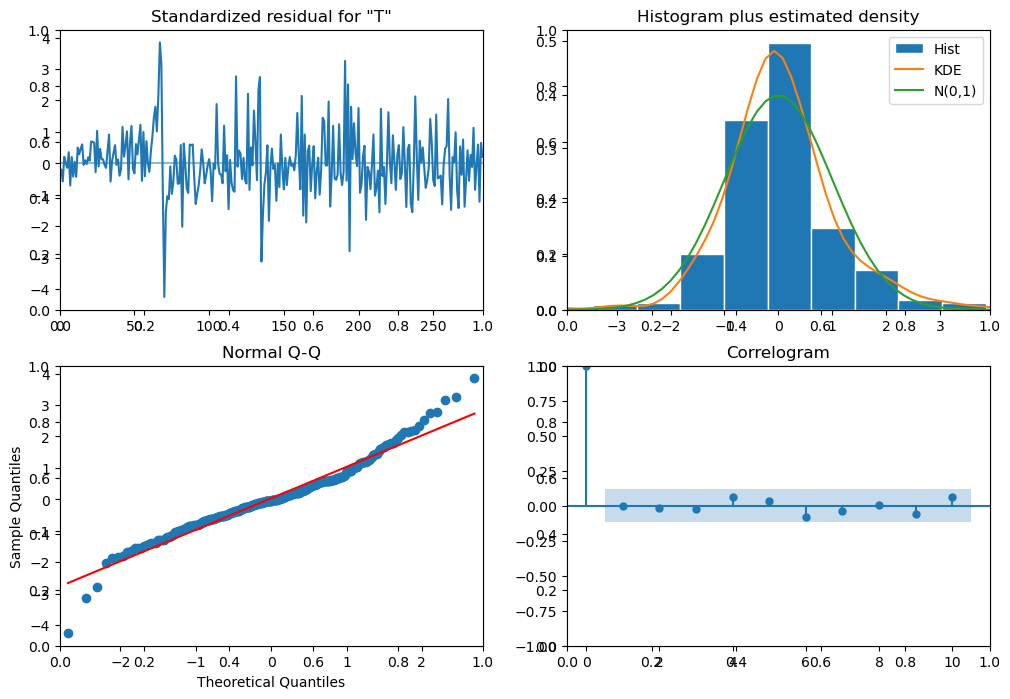

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP2.plot_diagnostics(fig=fig)
plt.show()

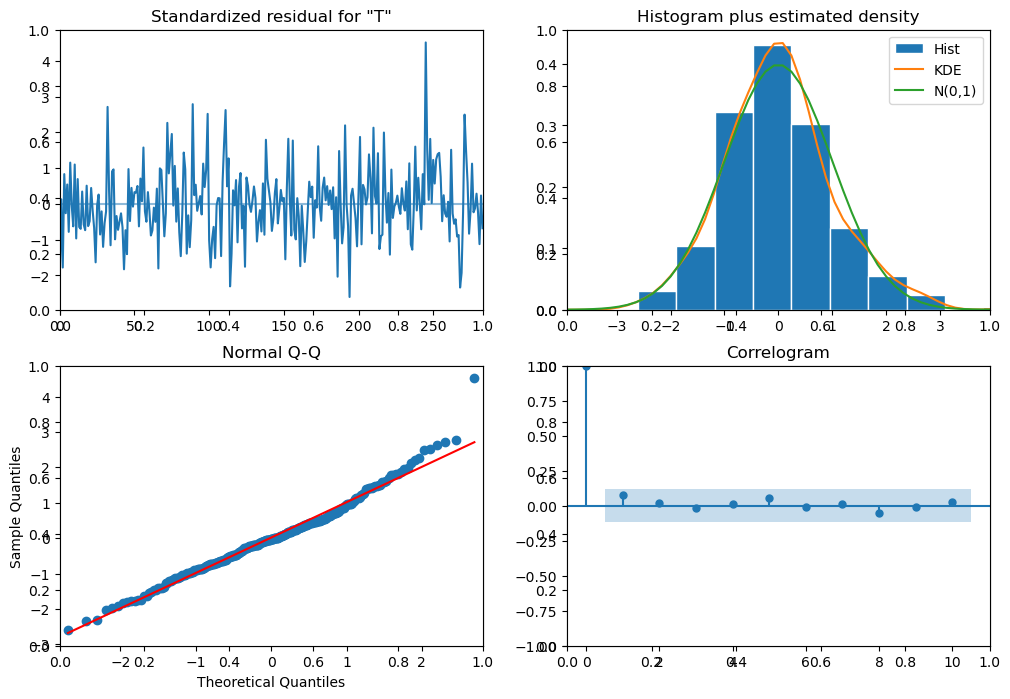

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD.plot_diagnostics(fig=fig)
plt.show()

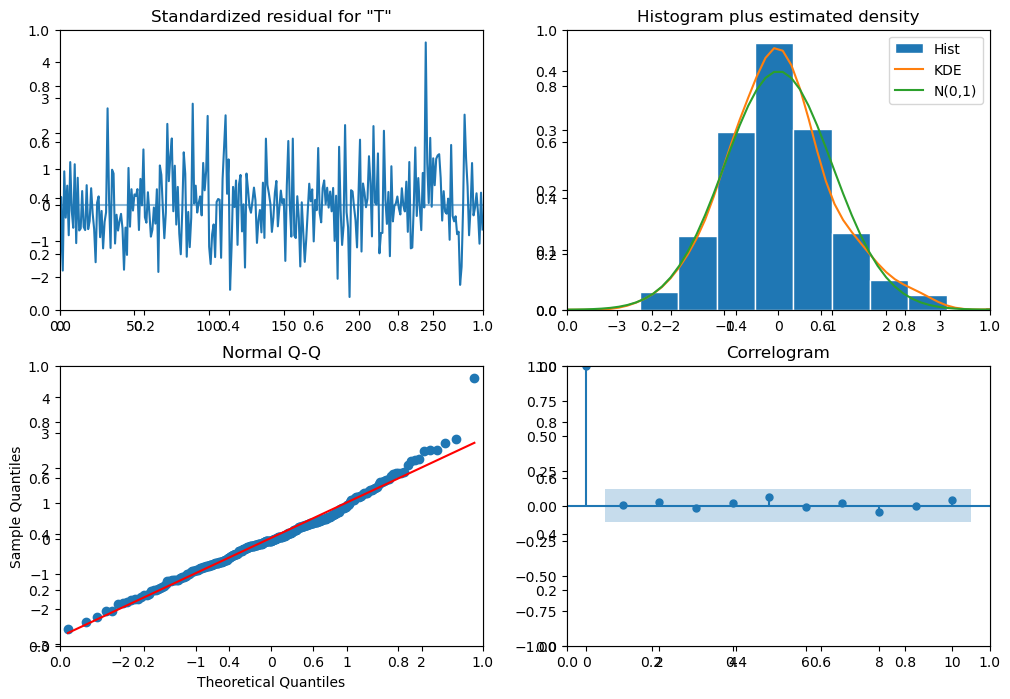

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD1.plot_diagnostics(fig=fig)
plt.show()

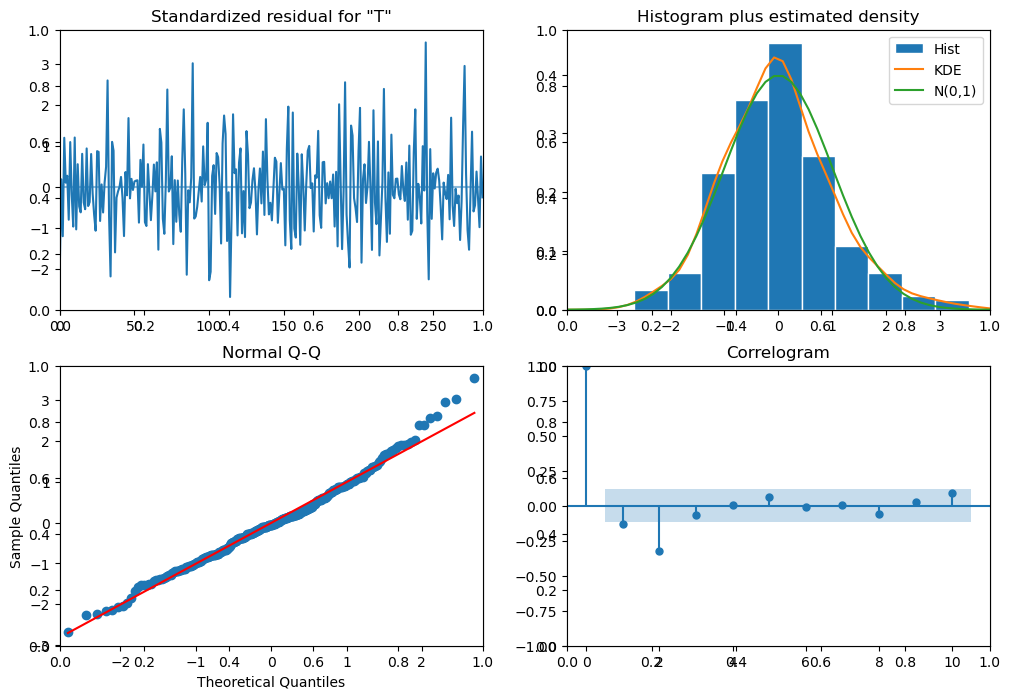

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD2.plot_diagnostics(fig=fig)
plt.show()

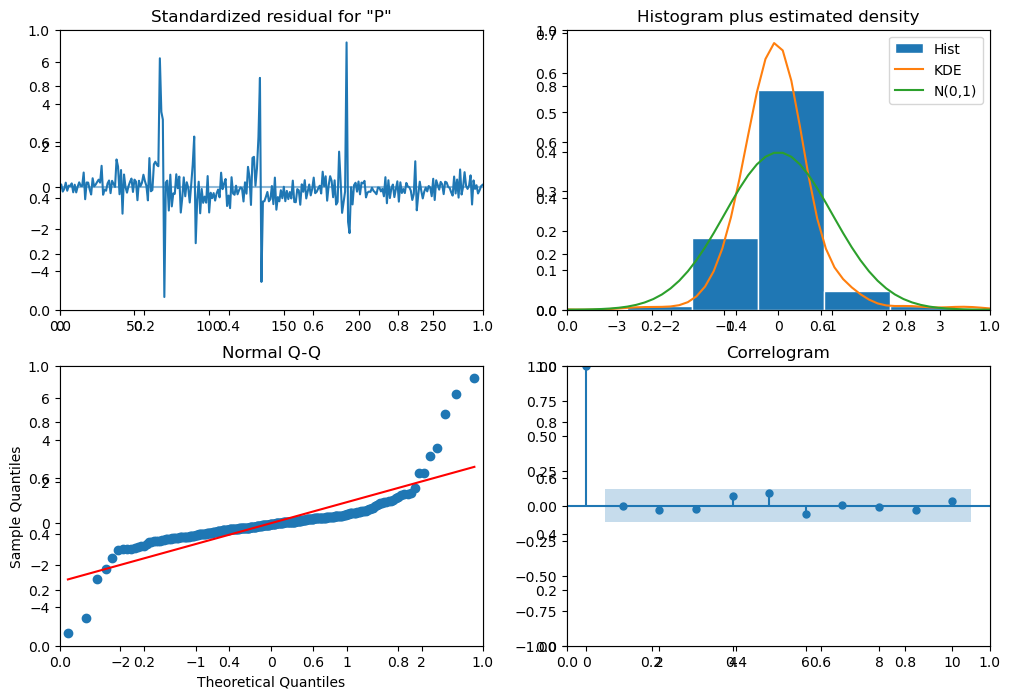

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP.plot_diagnostics(fig=fig)
plt.show()

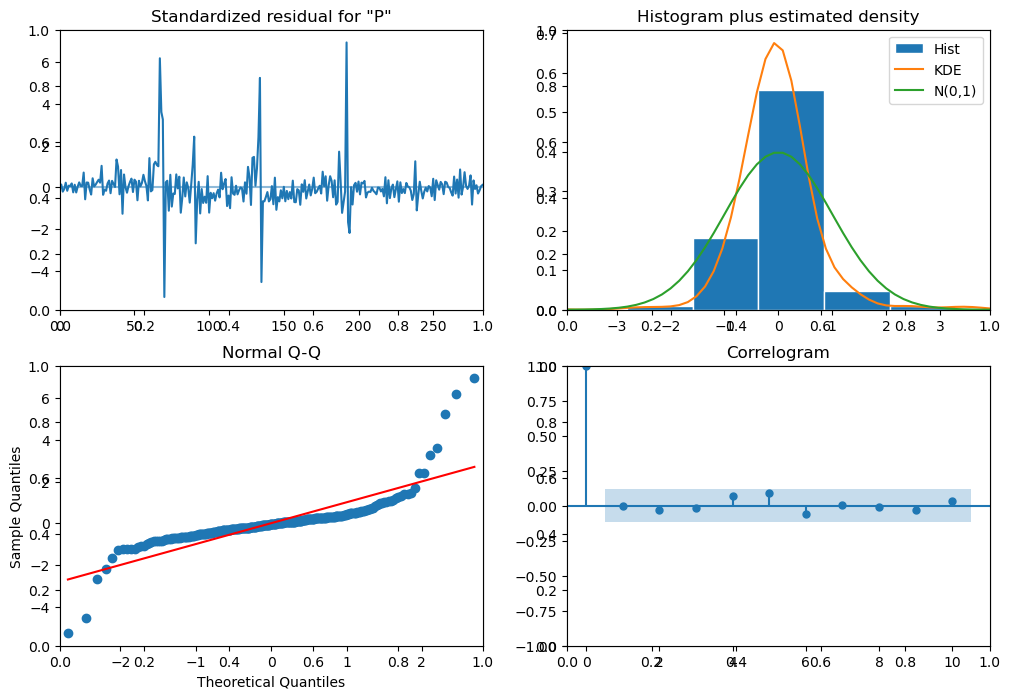

In [152]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP1.plot_diagnostics(fig=fig)
plt.show()

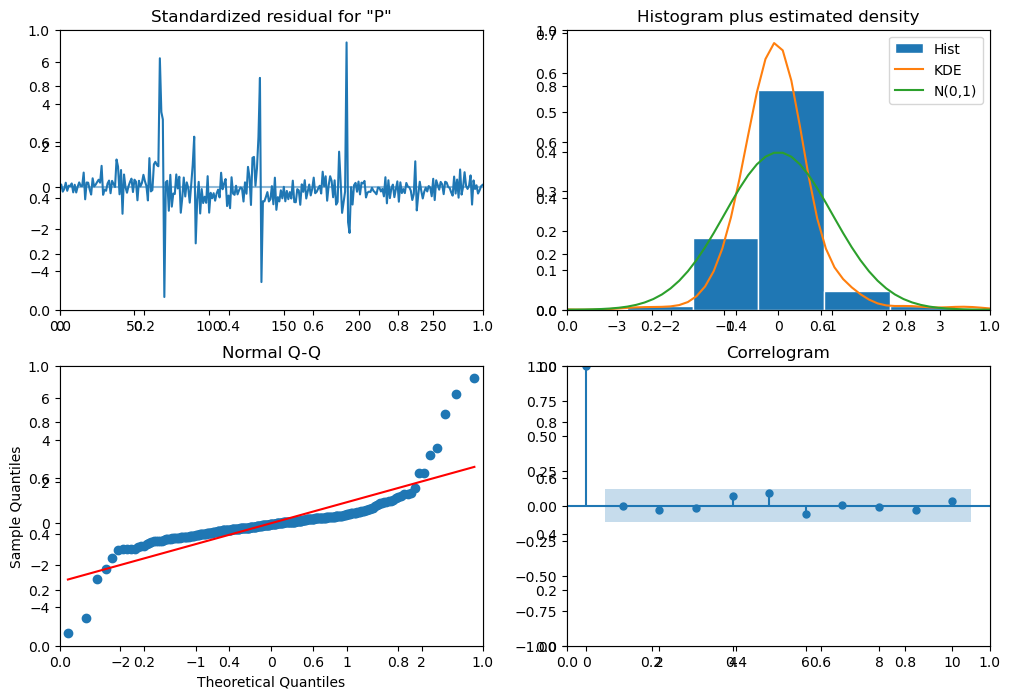

In [153]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP2.plot_diagnostics(fig=fig)
plt.show()

**Test de Breusch-Godfrey, test Ljung-Box de correlación serial y test de Jarque-Bera de normalidad**

**WAPP**

In [154]:
import statsmodels.api as sm
bg_WAPP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_WAPP, nlags=3)
fstat = bg_WAPP[2]
fpval = bg_WAPP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.10983607117414769

fpval: 0.9543103734334928



In [155]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
residuos_WAPP = result_sarima_WAPP.resid
# Test de Ljung-Box
lb_test_WAPP = acorr_ljungbox(residuos_WAPP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_WAPP)

    lb_stat  lb_pvalue
1  0.042108   0.837414


In [156]:
import statsmodels.stats.stattools
from statsmodels.stats.stattools import jarque_bera
residuos_WAPP = result_sarima_WAPP.resid
# Test de Jarque-Bera
jb_test_WAPP = jarque_bera(residuos_WAPP)
print(f"Estadístico de Jarque-Bera: {jb_test_WAPP[0]}")
print(f"P-valor: {jb_test_WAPP[1]}")

Estadístico de Jarque-Bera: 254.51578629007366
P-valor: 5.4025553933634865e-56


**TP**

In [157]:
bg_TP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_TP, nlags=3)
fstat = bg_TP[2]
fpval = bg_TP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.23545965423922624

fpval: 0.8716161328021943



In [158]:
residuos_TP = result_sarima_TP.resid
# Test de Ljung-Box
lb_test_TP = acorr_ljungbox(residuos_TP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_TP)

    lb_stat  lb_pvalue
1  0.164789   0.684786


In [159]:
residuos_TP = result_sarima_TP.resid
# Test de Jarque-Bera
jb_test_TP = jarque_bera(residuos_TP)
print(f"Estadístico de Jarque-Bera: {jb_test_TP[0]}")
print(f"P-valor: {jb_test_TP[1]}")

Estadístico de Jarque-Bera: 50.41657971372293
P-valor: 1.1276616654113356e-11


**TAD**

In [160]:
bg_TAD = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_TAD, nlags=3)
fstat = bg_TAD[2]
fpval = bg_TAD[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.3957718325223795

fpval: 0.756143476545698



In [161]:
residuos_TAD = result_sarima_TAD.resid
# Test de Ljung-Box
lb_test_TAD = acorr_ljungbox(residuos_TAD, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_TAD)

    lb_stat  lb_pvalue
1  0.128529   0.719962


In [162]:
residuos_TAD = result_sarima_TAD.resid
# Test de Jarque-Bera
jb_test_TAD = jarque_bera(residuos_TAD)
print(f"Estadístico de Jarque-Bera: {jb_test_TAD[0]}")
print(f"P-valor: {jb_test_TAD[1]}")

Estadístico de Jarque-Bera: 121.0096043938253
P-valor: 5.285648480765891e-27


**PP**

In [163]:
bg_PP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_PP, nlags=3)
fstat = bg_PP[2]
fpval = bg_PP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.1229580553259993

fpval: 0.9465113516996655



In [164]:
residuos_PP = result_sarima_PP.resid
# Test de Ljung-Box
lb_test_PP = acorr_ljungbox(residuos_PP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_PP)

    lb_stat  lb_pvalue
1  0.000002   0.998792


In [165]:
residuos_PP = result_sarima_PP.resid
# Test de Breusch-Godfrey
lags = 1  # Número de rezagos a incluir en el test
# Test de Jarque-Bera
jb_test_PP = jarque_bera(residuos_PP)
print(f"Estadístico de Jarque-Bera: {jb_test_PP[0]}")
print(f"P-valor: {jb_test_PP[1]}")

Estadístico de Jarque-Bera: 4385.111478410547
P-valor: 0.0


**Test de Breusch-Pagan**

**WAPP**

In [166]:
import statsmodels.api as sm
residuos_WAPP = result_sarima_WAPP.resid
exog = sm.add_constant(np.arange(len(residuos_WAPP)))
bp_WAPP = sm.stats.het_breuschpagan(residuos_WAPP, exog_het=exog)
bp_statistic = bp_WAPP[0]
bp_pval = bp_WAPP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

bp_statistic: 0.9464097034265656

bp_pval: 0.3306348632194038



**TP**

In [167]:
residuos_TP = result_sarima_TP.resid
exog = sm.add_constant(np.arange(len(residuos_TP)))
bp_TP = sm.stats.het_breuschpagan(residuos_TP, exog_het=exog)
bp_statistic = bp_TP[0]
bp_pval = bp_TP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')


bp_statistic: 0.020962014695822262

bp_pval: 0.8848824840213764



**TAD**

In [168]:
residuos_TAD = result_sarima_TAD.resid
exog = sm.add_constant(np.arange(len(residuos_TAD)))
bp_TAD = sm.stats.het_breuschpagan(residuos_TAD, exog_het=exog)
bp_statistic = bp_TAD[0]
bp_pval = bp_TAD[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

bp_statistic: 0.479449582481159

bp_pval: 0.4886717389589421



**PP**

In [169]:
residuos_PP = result_sarima_PP.resid
exog = sm.add_constant(np.arange(len(residuos_PP)))
bp_PP = sm.stats.het_breuschpagan(residuos_PP, exog_het=exog)
bp_statistic = bp_PP[0]
bp_pval = bp_PP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')


bp_statistic: 0.7707452995140296

bp_pval: 0.3799865866759664



---
### **9. Pronosticar con el modelo seleccionado para cada serie para una ventana temporal razonable, en función de la periodicidad y el comportamiento de las mismas.**

**Para realizar los pronósticos seleccionamos los 4 mejores modelos del punto 6 WAPP:(ARIMA 2,0,2), TP:(ARIMA 2,0,1), TAD:(ARIMA 1,0,1) y PP:(ARIMA 1,0,1)**

**WAPP**

In [170]:
modelo_sarima_WAPP = SARIMAX(train_WAPP, order=(2,0,1), seasonal_order=(0,0,0,7))
result_sarima_WAPP = modelo_sarima_WAPP.fit()
print(result_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  285
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1124.763
Date:                Fri, 10 Nov 2023   AIC                           2257.526
Time:                        18:08:38   BIC                           2272.136
Sample:                             0   HQIC                          2263.383
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4059      0.068     20.795      0.000       1.273       1.538
ar.L2         -0.4087      0.066     -6.182      0.000      -0.538      -0.279
ma.L1         -0.8599      0.037    -23.296      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [171]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))


In [172]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP = result_sarima_WAPP.get_forecast(len(test_WAPP))

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [173]:
predicciones_WAPP = result_sarima_WAPP.get_forecast(10)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [174]:
WAPP_pred = predicciones_sarima_WAPP.predicted_mean
WAPP_int = predicciones_sarima_WAPP.conf_int()


In [175]:
WAPP_pred.index = test_WAPP.index
WAPP_int.index = test_WAPP.index


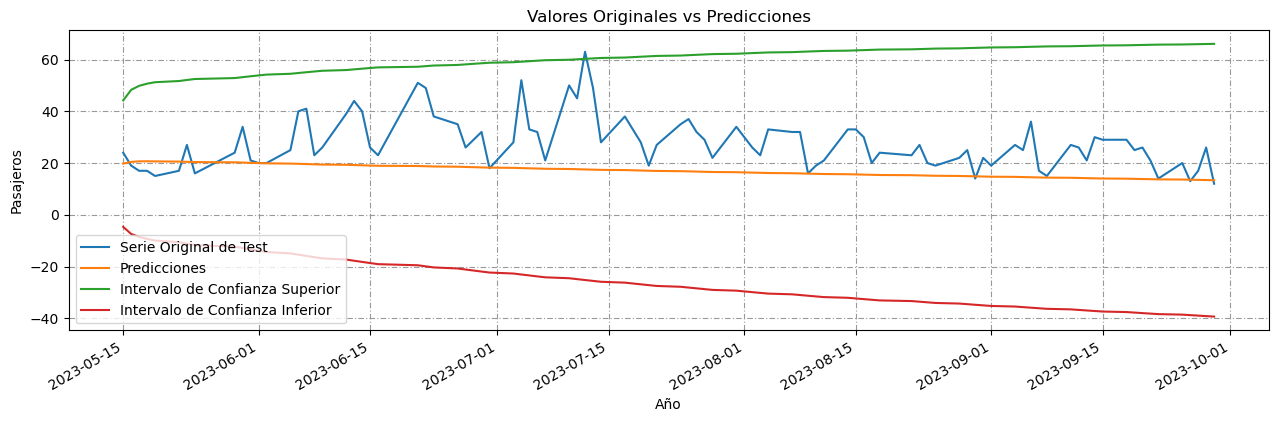

In [176]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_WAPP, WAPP_pred, WAPP_int)


In [177]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [178]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP.predicted_mean)


MSE: 206.58574410016521
MAE: 11.312341643221604
RMSE: 14.373090972374913
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\2869533874.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TP**

In [179]:
modelo_sarima_TP = SARIMAX(train_TP, order=(1,1,1), seasonal_order=(0,0,0,7))
result_sarima_TP = modelo_sarima_TP.fit()
print(result_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  285
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1389.810
Date:                Fri, 10 Nov 2023   AIC                           2785.620
Time:                        18:09:08   BIC                           2796.567
Sample:                             0   HQIC                          2790.008
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.066      5.580      0.000       0.239       0.498
ma.L1         -0.7794      0.038    -20.592      0.000      -0.854      -0.705
sigma2      1041.1599     63.114     16.496      0.0

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [180]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))


In [186]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP = result_sarima_TP.get_forecast(len(test_TP))


c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [187]:
predicciones_TP = result_sarima_TP.get_forecast(10)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [188]:
TP_pred = predicciones_sarima_TP.predicted_mean
TP_int = predicciones_sarima_TP.conf_int()


In [189]:
TP_pred.index = test_TP.index
TP_int.index = test_TP.index


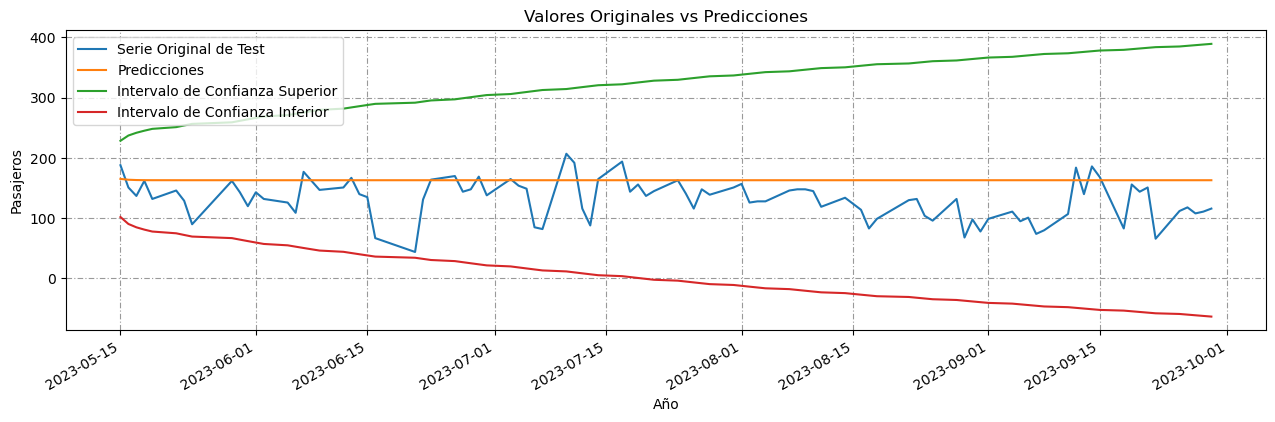

In [190]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TP, TP_pred, TP_int)


In [191]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [192]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP.predicted_mean)


MSE: 2019.4337880964642
MAE: 35.88290148886284
RMSE: 44.93811064226515
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\2869533874.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**TAD**

In [193]:
modelo_sarima_TAD = SARIMAX(train_TAD, order=(1,1,0), seasonal_order=(0,0,0,7))
result_sarima_TAD = modelo_sarima_TAD.fit()
print(result_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  285
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1100.933
Date:                Fri, 10 Nov 2023   AIC                           2205.866
Time:                        18:11:34   BIC                           2213.164
Sample:                             0   HQIC                          2208.792
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4716      0.052     -9.079      0.000      -0.573      -0.370
sigma2       136.2215     10.211     13.341      0.000     116.208     156.235
Ljung-Box (L1) (Q):                   4.91   Jarque-

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [194]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))


In [195]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD = result_sarima_TAD.get_forecast(len(test_TAD))


c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [196]:
predicciones_TAD = result_sarima_TAD.get_forecast(10)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [197]:
TAD_pred = predicciones_sarima_TAD.predicted_mean
TAD_int = predicciones_sarima_TAD.conf_int()


In [198]:
TAD_pred.index = test_TAD.index
TAD_int.index = test_TAD.index


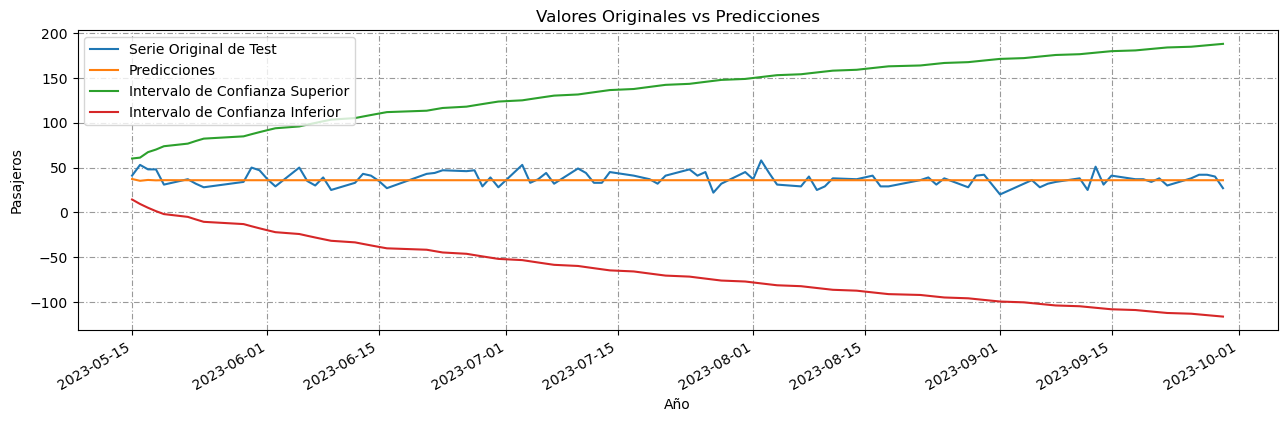

In [199]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TAD, TAD_pred, TAD_int)


In [200]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [201]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD.predicted_mean)


MSE: 59.590107397962726
MAE: 6.3179463606906525
RMSE: 7.719462895691819
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\2869533874.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


**PP**

In [202]:
modelo_sarima_PP = SARIMAX(train_PP, order=(1,1,2), seasonal_order=(0,0,0,7))
result_sarima_PP = modelo_sarima_PP.fit()
print(result_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  285
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1229.412
Date:                Fri, 10 Nov 2023   AIC                           2466.824
Time:                        18:12:06   BIC                           2481.420
Sample:                             0   HQIC                          2472.676
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5778      0.075      7.698      0.000       0.431       0.725
ma.L1         -0.9635      0.089    -10.808      0.000      -1.138      -0.789
ma.L2         -0.0044      0.073     -0.060      0.9

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [203]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))


In [204]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP = result_sarima_PP.get_forecast(len(test_PP))


c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [205]:
predicciones_PP = result_sarima_PP.get_forecast(10)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [206]:
PP_pred = predicciones_sarima_PP.predicted_mean
PP_int = predicciones_sarima_PP.conf_int()


In [207]:
PP_pred.index = test_PP.index
PP_int.index = test_PP.index


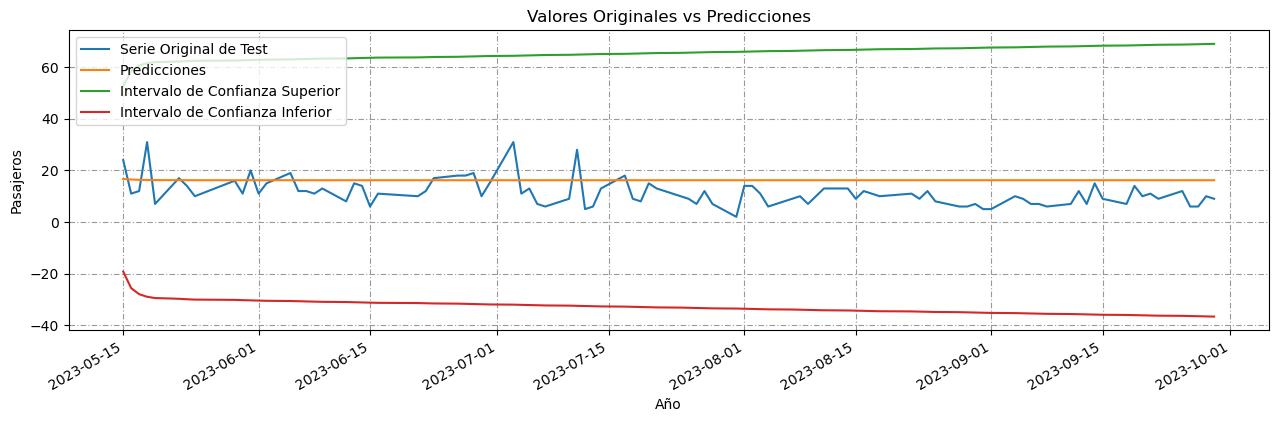

In [208]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_PP, PP_pred, PP_int)


In [209]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [210]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP.predicted_mean)


MSE: 49.979752126712555
MAE: 6.223413232632411
RMSE: 7.069635926036966
MAPE: nan


C:\Users\German\AppData\Local\Temp\ipykernel_15692\2869533874.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')


In [211]:
datos = {'Modelos': ['WAPP','WAPP1','WAPP2'],
         'AIC': [result_sarima_WAPP.aic, result_sarima_WAPP1.aic, result_sarima_WAPP2.aic ],
         'BIC': [result_sarima_WAPP.bic, result_sarima_WAPP1.bic, result_sarima_WAPP2.bic],
         'MAE': [result_sarima_WAPP.mse, result_sarima_WAPP1.mse, result_sarima_WAPP2.mse],
         'MSE': [result_sarima_WAPP.mae, result_sarima_WAPP1.mae, result_sarima_WAPP2.mae],
         'RMSE': [result_sarima_WAPP.rmse, modelo_sarima_WAPP1.rmse, modelo_sarima_WAPP2.rmse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

AttributeError: 'SARIMAXResults' object has no attribute 'rmse'

---
### **10. Construir un modelo de Vectores Autorregresivos (VAR) con las series elegidas para realizar predicciones sobre cada una de ellas.**

In [212]:
serieVAR=pd.concat([data.WAPP, data.TP, data.TAD, data.PP], axis=1)

In [213]:
serieVAR.head()

WAPP  TP  TAD  PP
FECHA                        
2022-03-15    19  78   53   9
2022-03-16    12  70   26  12
2022-03-17    14  66   41  14
2022-03-18    67  50   20   9
2022-03-21    45  65   44   8

In [214]:
serieVAR.tail()

WAPP   TP  TAD  PP
FECHA                         
2023-09-25    20  112   38  12
2023-09-26    13  118   42   6
2023-09-27    17  108   42   6
2023-09-28    26  111   40  10
2023-09-29    12  116   27   9

In [215]:
# Separacion Train/Test

# Variable que guarda el porcentaje de train
split = .75

# Seleccion de train
train = serieVAR.iloc[:round(len(serieVAR)*split)]

# Seleccionamos de test
test = serieVAR.iloc[round(len(serieVAR)*split):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train,"\n\n", test)

            WAPP   TP  TAD  PP
FECHA                         
2022-03-15    19   78   53   9
2022-03-16    12   70   26  12
2022-03-17    14   66   41  14
2022-03-18    67   50   20   9
2022-03-21    45   65   44   8
...          ...  ...  ...  ..
2023-05-08    28  158   43  18
2023-05-09    23  179   38  12
2023-05-10    28  132   29  11
2023-05-11    16  169   42  14
2023-05-12    18  169   33  17

[285 rows x 4 columns] 

             WAPP   TP  TAD  PP
FECHA                         
2023-05-15    24  188   41  24
2023-05-16    19  151   53  11
2023-05-17    17  137   48  12
2023-05-18    17  162   48  31
2023-05-19    15  132   31   7
...          ...  ...  ...  ..
2023-09-25    20  112   38  12
2023-09-26    13  118   42   6
2023-09-27    17  108   42   6
2023-09-28    26  111   40  10
2023-09-29    12  116   27   9

[95 rows x 4 columns]


In [216]:
train

WAPP   TP  TAD  PP
FECHA                         
2022-03-15    19   78   53   9
2022-03-16    12   70   26  12
2022-03-17    14   66   41  14
2022-03-18    67   50   20   9
2022-03-21    45   65   44   8
...          ...  ...  ...  ..
2023-05-08    28  158   43  18
2023-05-09    23  179   38  12
2023-05-10    28  132   29  11
2023-05-11    16  169   42  14
2023-05-12    18  169   33  17

[285 rows x 4 columns]

In [217]:
test

WAPP   TP  TAD  PP
FECHA                         
2023-05-15    24  188   41  24
2023-05-16    19  151   53  11
2023-05-17    17  137   48  12
2023-05-18    17  162   48  31
2023-05-19    15  132   31   7
...          ...  ...  ...  ..
2023-09-25    20  112   38  12
2023-09-26    13  118   42   6
2023-09-27    17  108   42   6
2023-09-28    26  111   40  10
2023-09-29    12  116   27   9

[95 rows x 4 columns]

**Criterio de Granger**

In [218]:
from statsmodels.tsa.stattools import grangercausalitytests

In [219]:
# P-valores menores al nivel de significancia (0.05) implica que la hipotesis nula (X no causa Y) puede rechazarse.
# testgr: Es el tipo de prueba que se utilizará para evaluar la causalidad de Granger. Por defecto, se utiliza 'ssr_chi2test', que es una prueba basada en chi-cuadrado,

def grangers_causation_matrix(data, variables, maxlag, testgr='ssr_chi2test', verbose=False):


    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [(test_result[i+1][0][testgr][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# se agrega '_x' al final de los nombres de las columnas para indicar que son las variables "causantes" y '_y' al final de los nombres de las filas para indicar que son las variables "afectadas".

In [220]:
testgr = 'ssr_chi2test'
grangers_causation_matrix(train, variables = train.columns, maxlag=10)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since function

WAPP_x          TP_x     TAD_x      PP_x
WAPP_y  1.000000  2.737709e-10  0.017332  0.000005
TP_y    0.302729  1.000000e+00  0.018828  0.000222
TAD_y   0.254230  8.485555e-02  1.000000  0.002437
PP_y    0.055274  1.980491e-07  0.026086  1.000000

In [221]:
from statsmodels.tsa.api import VAR

In [222]:
model = VAR(train)

c:\Users\German\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [223]:
x = model.select_order(maxlags=36)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [224]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Nov, 2023
Time:                     18:13:40
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    22.3658
Nobs:                     284.000    HQIC:                   22.2118
Log likelihood:          -4731.37    FPE:                3.99706e+09
AIC:                      22.1088    Det(Omega_mle):     3.72754e+09
--------------------------------------------------------------------
Results for equation WAPP
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           3.193429         3.440182            0.928           0.353
L1.WAPP         0.437247         0.052915            8.263           0.000
L1.TP           0.061632         0.017436            3.535           0.000
L1.TAD    

In [225]:
# Funcion que recibe listas con las predicciones e intervalos de confianza de las 4 series y devuelve un
# dataframe para la serie indicada por la variable indice
def serializar(predicciones_, test_, indice, futuro_, intervalos=True):

    serie = {
        "FECHA": test_.index[:futuro_],
        "serie"+str(indice): predicciones_[0][:,indice-1].tolist(),
        "serie"+str(indice)+"_inf": predicciones_[1][:,indice-1].tolist(),
        "serie"+str(indice)+"_sup": predicciones_[2][:,indice-1].tolist()}
    serie = pd.DataFrame(serie, columns=["FECHA", "serie"+str(indice),
                                         "serie"+str(indice)+"_inf", "serie"+str(indice)+"_sup"])
    serie.set_index("FECHA", inplace=True)
    if (intervalos==False):
        serie.loc[serie["serie"+str(indice)+"_inf"] < 0, "serie"+str(indice)+"_inf"] = 0
        serie.loc[serie["serie"+str(indice)+"_sup"] < 0, "serie"+str(indice)+"_sup"] = 0
    return serie

In [226]:
def graficar_pred(serie_test, serie_pred, titulo="Valores Originales vs Predicciones",
                  xlabel="Fecha", ylabel="Valor", intervalos=True):
    # serie_test:
    # serie_pred:

    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.iloc[:,0].plot(label="Predicciones")
    if (intervalos==True):
        serie_pred.iloc[:,2].plot(label="Intervalo de Confianza Superior")
        serie_pred.iloc[:,1].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.5', dashes=(5,2,1,2))

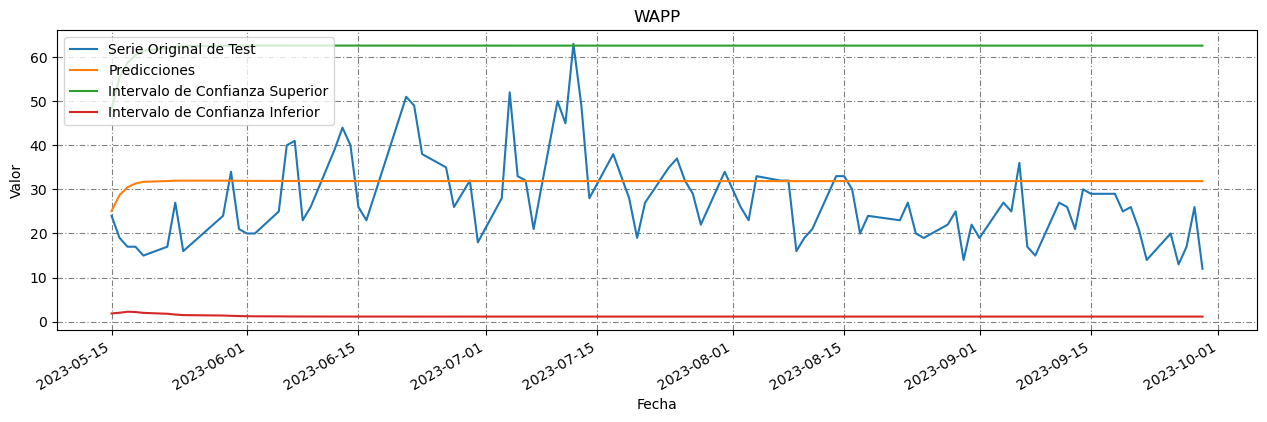

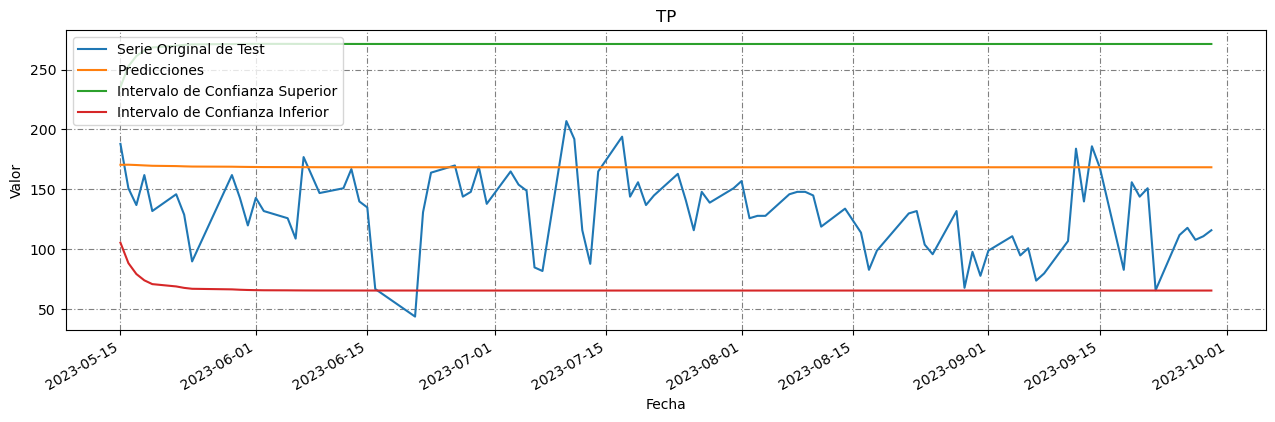

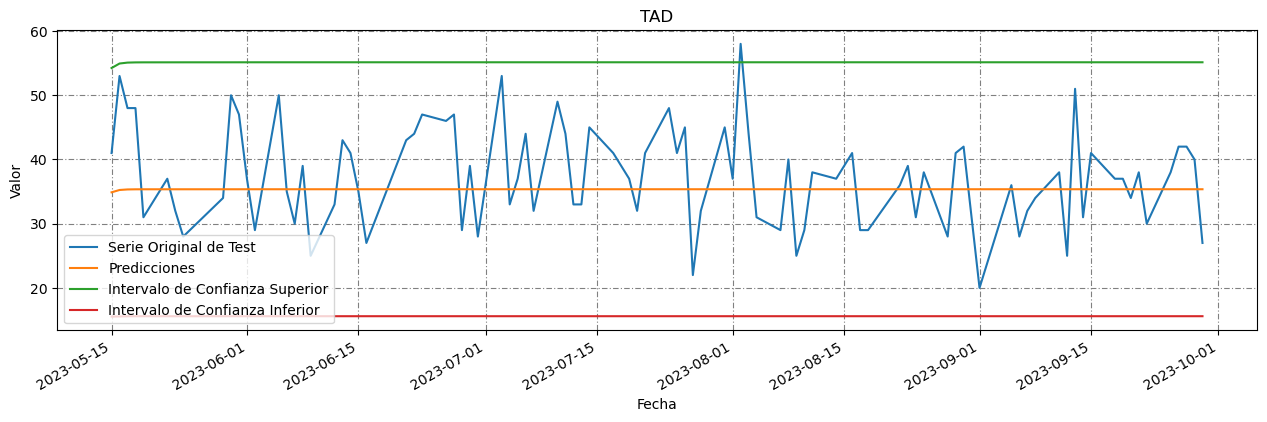

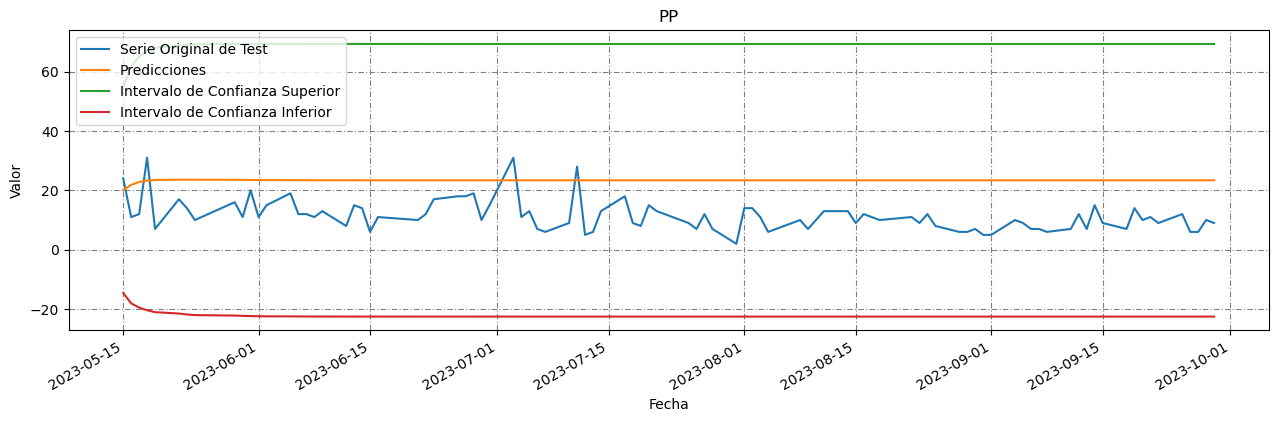

In [227]:
# Con la variable futuro se indican cuantas unidades en tiempo
# hacia adelante se quieren predecir
futuro = 95
lag_orden = 1

predicciones = model_fitted.forecast_interval(train.values[-lag_orden:], steps=futuro)

df = list()
for i in [1, 2, 3, 4]:
    df.append(serializar(predicciones, test, i, futuro))

for i, serie in enumerate(serieVAR):
    graficar_pred(test[serie][:futuro], df[i], titulo=serie)

**Análisis de Residuos**

In [228]:
def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [229]:
def test_residuos(residuos):


    # Test de Jarque Bera
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    jarquebera = jarque_bera(residuos)
    print('Jarque-Bera')
    print(f'p-valor: {jarquebera[1]}\n')

    # Test de Shapiro Wilks
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    shapir = shapiro(residuos)
    print('Shapiro')
    print(f'p-valor: {shapir[1]}\n')

In [230]:
def evaluar_residuos(residuos):
    residuos.plot(title='Residuos', figsize=(12, 3))
    plt.axhline(0, linestyle='--', color='k')
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    ax[0].set_title('Residuos KDE')
    ax[1].set_title('Q-Q Plot')
    residuos.plot(kind='kde', ax=ax[0])
    probplot(residuos, dist='norm', plot=ax[1])
    plt.show()
    acf = plot_acf(residuos)
    acf.set_size_inches(12,3)
    plt.show()
    print('Descriptivo Residuos\n')
    print(f'{residuos.describe()}\n\n')
    print('Test sobre los Residuos\n')
    test_residuos(residuos)

In [231]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey

In [232]:
futuro

95

**WAPP**

MSE: 445.40266742696684
MAE: 20.402571876981245
RMSE: 21.10456508499919
MAPE: 2.3865
Evaluacion de residuos de Serie 


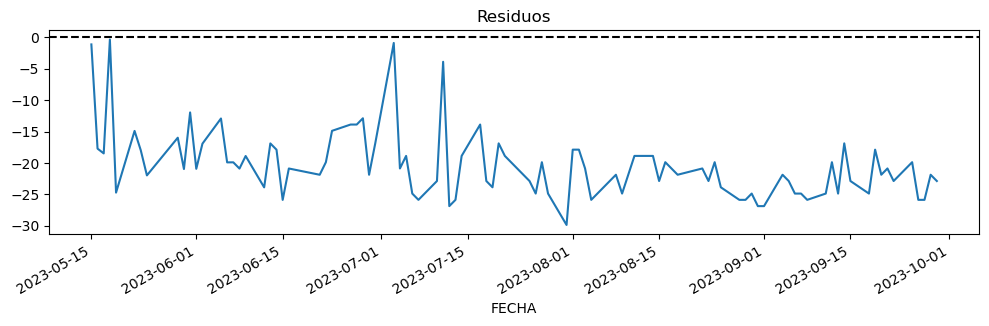

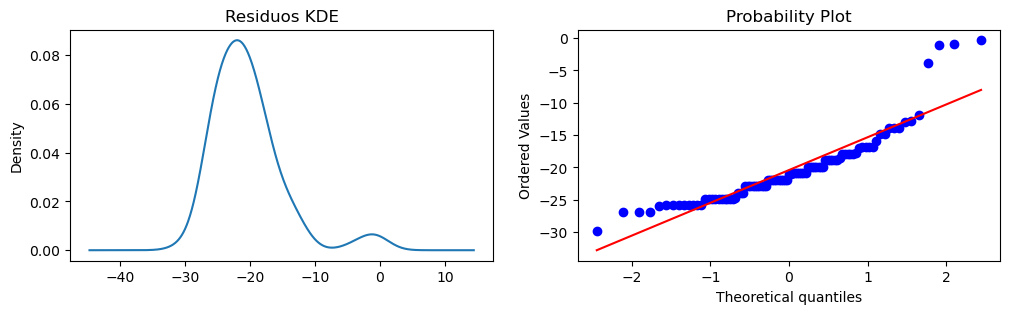

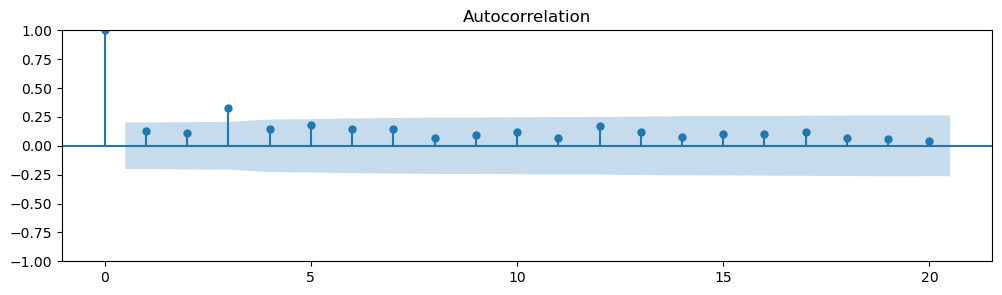

Descriptivo Residuos

count    95.000000
mean    -20.402572
std       5.426574
min     -29.879507
25%     -24.306598
50%     -20.965109
75%     -18.222579
max      -0.328368
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 5.311946560328171e-25

Shapiro
p-valor: 2.2529974330609548e-08



In [233]:
evaluar_metricas(test[serie][:futuro], df[0].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[0].iloc[:,0])

**TP**

MSE: 24762.42782143591
MAE: 157.28012739108902
RMSE: 157.36082047776668
MAPE: 16.9468
Evaluacion de residuos de Serie 


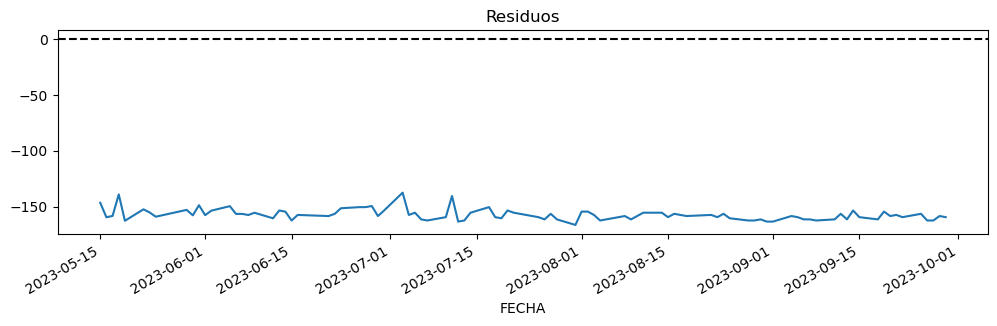

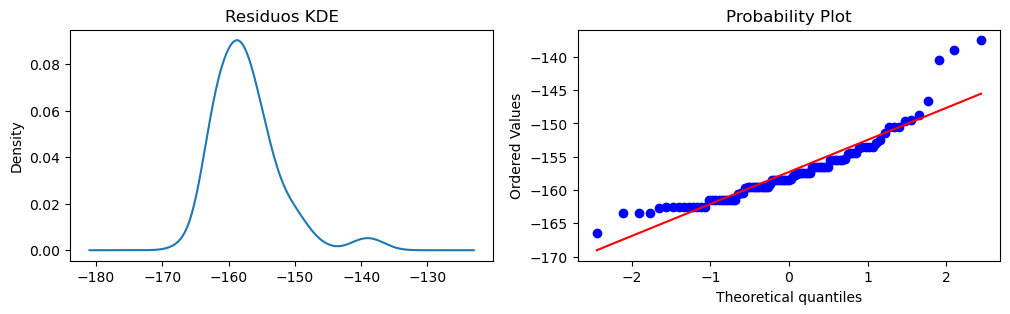

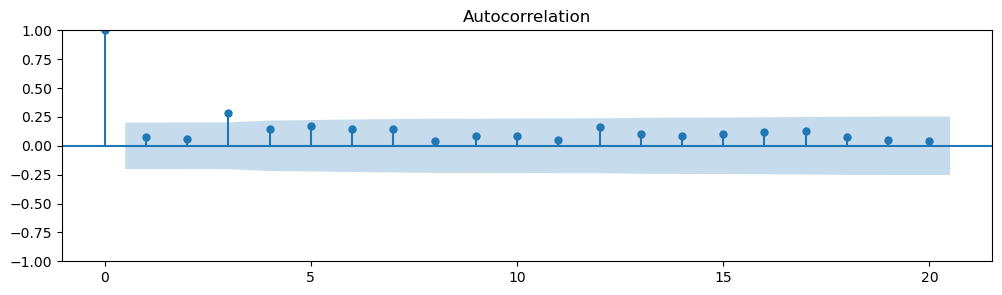

Descriptivo Residuos

count     95.000000
mean    -157.280127
std        5.065516
min     -166.498512
25%     -161.016538
50%     -158.498504
75%     -155.498505
max     -137.499778
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 4.8800972649834843e-20

Shapiro
p-valor: 2.7460757223707333e-07



In [234]:
evaluar_metricas(test[serie][:futuro], df[1].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[1].iloc[:,0])

**TAD**

MSE: 602.666090765557
MAE: 23.99924652301541
RMSE: 24.549258456530964
MAPE: 2.7641
Evaluacion de residuos de Serie 


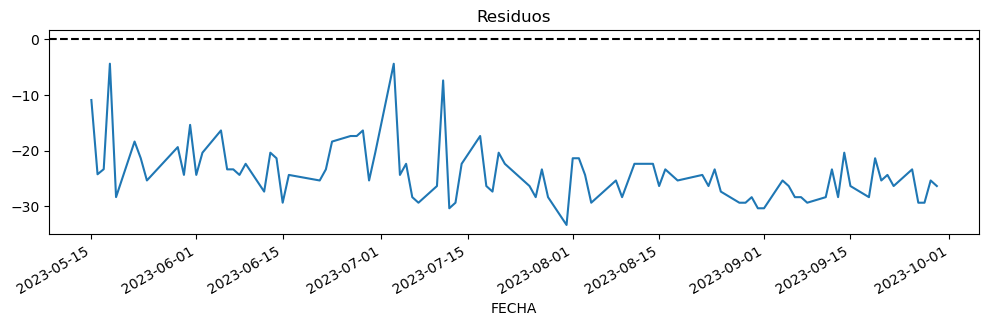

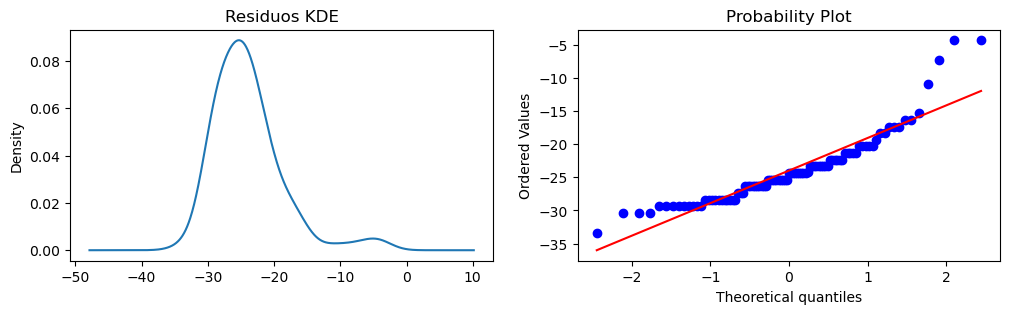

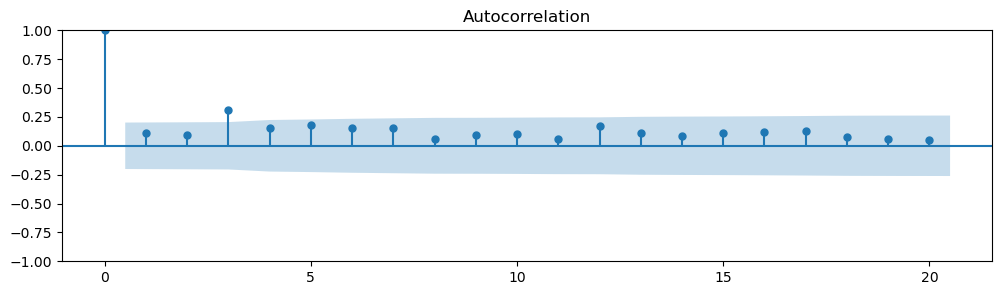

Descriptivo Residuos

count    95.000000
mean    -23.999247
std       5.194836
min     -33.364388
25%     -27.860876
50%     -24.364388
75%     -22.364049
max      -4.353250
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 4.7379264963104364e-21

Shapiro
p-valor: 1.3494647532752424e-07



In [235]:
evaluar_metricas(test[serie][:futuro], df[2].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[2].iloc[:,0])

**PP**

MSE: 171.33050538343764
MAE: 12.49241016080461
RMSE: 13.089327919470795
MAPE: 1.505
Evaluacion de residuos de Serie 


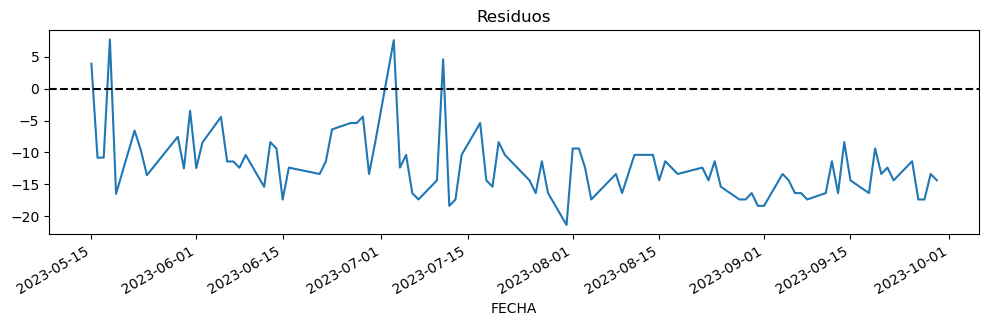

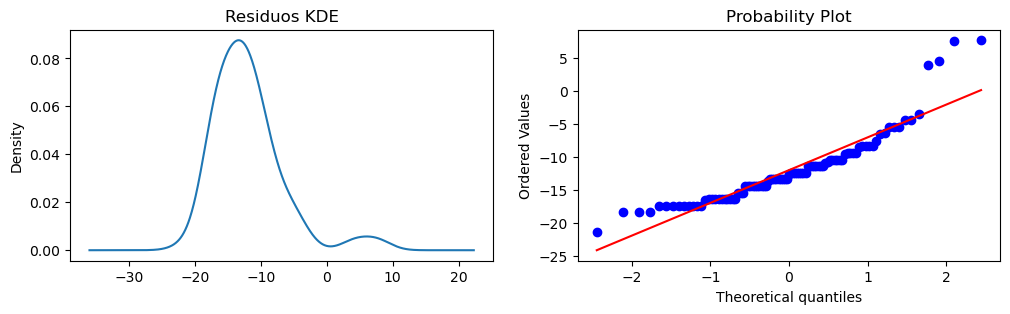

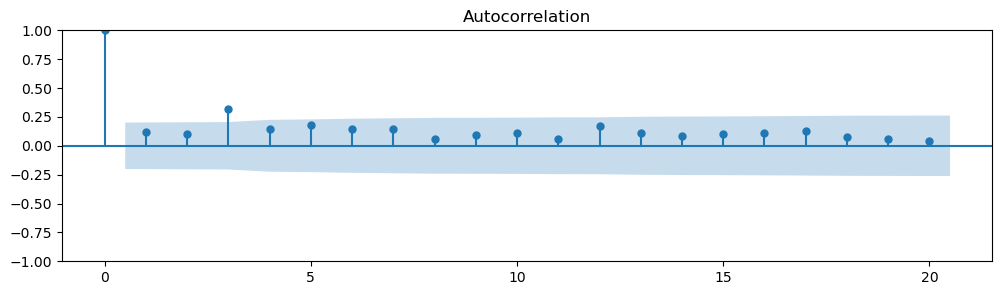

Descriptivo Residuos

count    95.000000
mean    -11.990084
std       5.278416
min     -21.391053
25%     -15.898343
50%     -12.521648
75%     -10.391051
max       7.715240
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 6.979063572697656e-22

Shapiro
p-valor: 6.744034664052379e-08



In [236]:
evaluar_metricas(test[serie][:futuro], df[3].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[3].iloc[:,0])

---
### **11. Analizar la función impulso respuesta y realizar distintas pruebas para analizar la causalidad. Justificar la elección del modelo con todo lo visto en clase. Es posible complementar con otros análisis.**

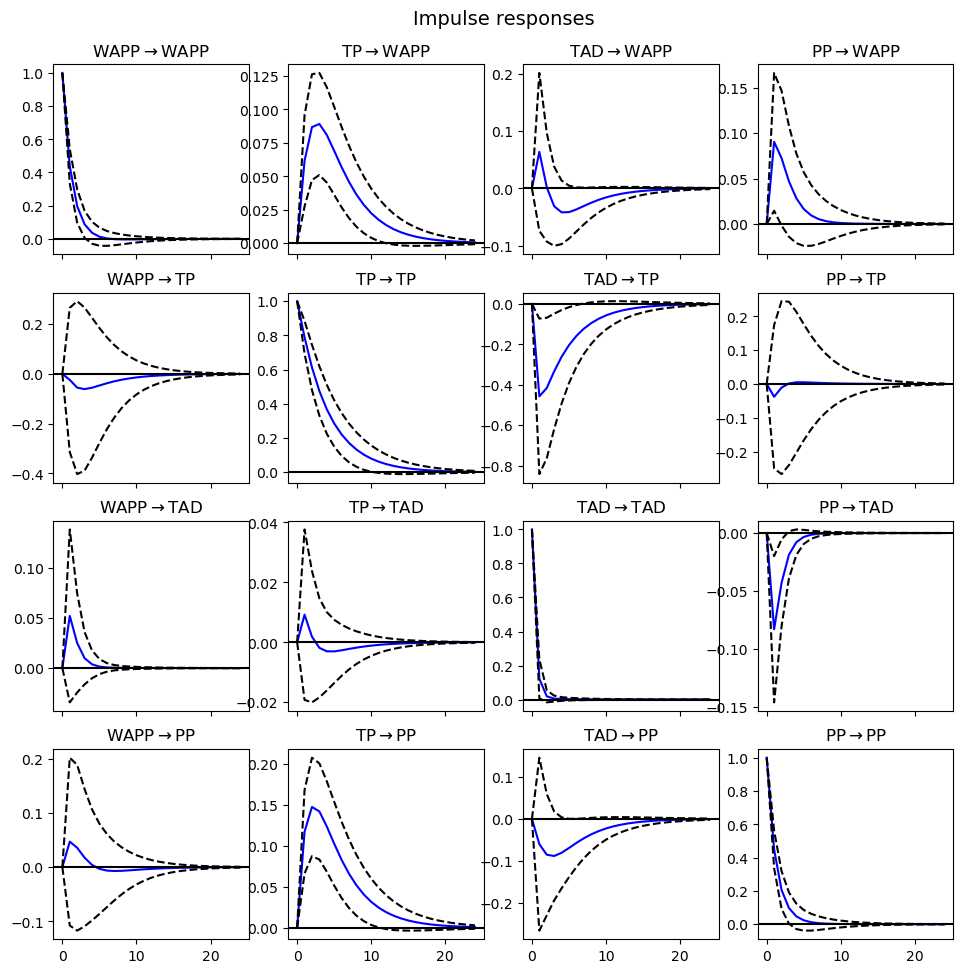

In [237]:
model_fitted.irf(24).plot();

---
### **12. En caso de presentar estacionalidad alguna de las series elegidas, se solicita determinar la representación más adecuada mediante algún modelo SARIMA y comparar los resultados con los modelos determinados en el trabajo anterior. (Opcional) Realizar la prueba de hipótesis de HEGY para testear la conjetura de raíz unitaria sobre las series elegidas.**

In [ ]:
# Las series no presentan estacionalidad